<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">TO GRANT OR NOT TOGRANT: DECIDING ON COMPENSATION BENEFITS</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Project</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1.-Environment-Setup)
    * [1.1 Importing Libraries](#1.1-Importing-Libraries)
    * [1.2 Importing the data set](#1.2-Importing-the-data-set)
* [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    * [2.1 General analysis of the data set](#2.1-General-analysis-of-the-data-set)
    * [2.1.1 Treating duplicates](#2.1.1-Treating-duplicates)
    * [2.1.2 Missing Values](#2.1.2-Missing-Values)
    * [2.1.3 Type conversion](#2.1.3-type-conversion)
    * [2.1.4 Visual Exploration](#2.1.4-visual-exploration)
    * [2.1.5 Numerical features- Univariate analysis](#215-numerical-features---univariate-analysis)
    * [2.1.6 Categorical Features- Univariate Analysis](#216-categorical-features--univariate-analysis)
    * [2.1.7 Multivariate Analysis](#217-multivariate-analysis)
    * [2.1.8 Feature Engineering](#218-feature-engineering)
* [3. Data Preprocessing](#3.-Data-Preprocessing)

## 1. Environment Setup

### 1.1 Importing libraries

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1.2 Importing the data set

In [17]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [18]:
train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')
test_data = pd.read_csv('test_data.csv', index_col='Claim Identifier')

C:\Users\inesm\AppData\Local\Temp\ipykernel_16036\3470921380.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')


In [19]:
#drop target variable
df = train_data.drop(columns='Claim Injury Type')

## 2. Exploratory Data Analysis

### 2.1 General analysis of the data set

In [20]:
df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30           31.0                              N   
5393091             2019-08-30           46.0                              N   
5393889             2019-12-06           40.0                              N   
957648180                  NaN            NaN                            NaN   
5393887             2019-12-30           61.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                       N                 0.00   
5393091             2020-01-01                       Y              1745.93   
5393889             2020-01-01                       N              1434.80   
957648180           2020-01-01                     NaN                  NaN   
5393887             2020-01-01                       N                  NaN   

                  Birth Year    C-2 Date    C-3 Date  \
Claim Identifier                                       
5393875               1988.0  2019-12-31         NaN   
5393091               1973.0  2020-01-01  2020-01-14   
5393889               1979.0  2020-01-01         NaN   
957648180                NaN         NaN         NaN   
5393887               1958.0  2019-12-31         NaN   

                                  Carrier Name Carrier Type County of Injury  \
Claim Identifier                                                               
5393875             NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE     ST. LAWRENCE   
5393091           ZURICH AMERICAN INSURANCE CO  1A. PRIVATE          WYOMING   
5393889              INDEMNITY INSURANCE CO OF  1A. PRIVATE           ORANGE   
957648180                                  NaN          NaN              NaN   
5393887                   STATE INSURANCE FUND      2A. SIF         DUTCHESS   

                 COVID-19 Indicator District Name First Hearing Date Gender  \
Claim Identifier                                                              
5393875                           N      SYRACUSE                NaN      M   
5393091                           N     ROCHESTER         2020-02-21      F   
5393889                           N        ALBANY                NaN      M   
957648180                       NaN           NaN                NaN    NaN   
5393887                           N        ALBANY                NaN      M   

                  IME-4 Count  Industry Code  \
Claim Identifier                               
5393875                   NaN           44.0   
5393091                   4.0           23.0   
5393889                   NaN           56.0   
957648180                 NaN            NaN   
5393887                   NaN           62.0   

                                          Industry Code Description  \
Claim Identifier                                                      
5393875                                                RETAIL TRADE   
5393091                                                CONSTRUCTION   
5393889           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...   
957648180                                                       NaN   
5393887                           HEALTH CARE AND SOCIAL ASSISTANCE   

                 Medical Fee Region  OIICS Nature of Injury Description  \
Claim Identifier                                                          
5393875                           I                                 NaN   
5393091                           I                                 NaN   
5393889                          II                                 NaN   
957648180                       NaN                                 NaN   
5393887                          II                                 NaN   

                  WCIO Cause of I

In [21]:
df.tail()

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
327160035                  NaN            NaN                            NaN   
6165075             2022-12-13           72.0                              N   
249875936                  NaN            NaN                            NaN   
120584215                  NaN            NaN                            NaN   
818961390                  NaN            NaN                            NaN   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
327160035           2022-12-31                     NaN                  NaN   
6165075             2022-12-31                       N                  0.0   
249875936           2022-12-31                     NaN                  NaN   
120584215           2022-12-31                     NaN                  NaN   
818961390           2022-12-31                     NaN                  NaN   

                  Birth Year    C-2 Date C-3 Date  \
Claim Identifier                                    
327160035                NaN         NaN      NaN   
6165075               1950.0  2022-12-31      NaN   
249875936                NaN         NaN      NaN   
120584215                NaN         NaN      NaN   
818961390                NaN         NaN      NaN   

                                   Carrier Name Carrier Type County of Injury  \
Claim Identifier                                                                
327160035                                   NaN          NaN              NaN   
6165075           TECHNOLOGY INSURANCE CO. INC.  1A. PRIVATE         SULLIVAN   
249875936                                   NaN          NaN              NaN   
120584215                                   NaN          NaN              NaN   
818961390                                   NaN          NaN              NaN   

                 COVID-19 Indicator District Name First Hearing Date Gender  \
Claim Identifier                                                              
327160035                       NaN           NaN                NaN    NaN   
6165075                           N    BINGHAMTON                NaN      F   
249875936                       NaN           NaN                NaN    NaN   
120584215                       NaN           NaN                NaN    NaN   
818961390                       NaN           NaN                NaN    NaN   

                  IME-4 Count  Industry Code       Industry Code Description  \
Claim Identifier                                                               
327160035                 NaN            NaN                             NaN   
6165075                   NaN           48.0  TRANSPORTATION AND WAREHOUSING   
249875936                 NaN            NaN                             NaN   
120584215                 NaN            NaN                             NaN   
818961390                 NaN            NaN                             NaN   

                 Medical Fee Region  OIICS Nature of Injury Description  \
Claim Identifier                                                          
327160035                       NaN                                 NaN   
6165075                           I                                 NaN   
249875936                       NaN                                 NaN   
120584215                       NaN                                 NaN   
818961390                       NaN                                 NaN   

                  WCIO Cause of Injury Code  WCIO Cause of Injury Description  \
Claim Identifier                                                                
327160035                               NaN                               NaN   
6165075                                25.0  FROM DIFFERENT LEVEL (ELEVATION) 

In [22]:
df.shape

(593471, 31)

Surprise we have a whole fucking lot of features with Dtype object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  County of Injury      

we can drop "OIICS Nature of Injury Description" because it doesn´t have any values

In [24]:
df.drop('OIICS Nature of Injury Description', axis=1,inplace=True)

In [25]:
df.describe(include='all')

Accident Date  Age at Injury Alternative Dispute Resolution  \
count         570337  574026.000000                         574026   
unique          5539            NaN                              3   
top       2020-03-01            NaN                              N   
freq            1245            NaN                         571412   
mean             NaN      42.114270                            NaN   
std              NaN      14.256432                            NaN   
min              NaN       0.000000                            NaN   
25%              NaN      31.000000                            NaN   
50%              NaN      42.000000                            NaN   
75%              NaN      54.000000                            NaN   
max              NaN     117.000000                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  \
count         593471                  574026         5.453750e+05   
unique          1096                       2                  NaN   
top       2020-03-06                       N                  NaN   
freq            1422                  392291                  NaN   
mean             NaN                     NaN         4.910883e+02   
std              NaN                     NaN         6.092918e+03   
min              NaN                     NaN         0.000000e+00   
25%              NaN                     NaN         0.000000e+00   
50%              NaN                     NaN         0.000000e+00   
75%              NaN                     NaN         8.410000e+02   
max              NaN                     NaN         2.828079e+06   

           Birth Year    C-2 Date    C-3 Date          Carrier Name  \
count   544948.000000      559466      187245                574026   
unique            NaN        2475        1648                  2046   
top               NaN  2021-05-11  2021-04-21  STATE INSURANCE FUND   
freq              NaN        1847         350                111144   
mean      1886.767604         NaN         NaN                   NaN   
std        414.644423         NaN         NaN                   NaN   
min          0.000000         NaN         NaN                   NaN   
25%       1965.000000         NaN         NaN                   NaN   
50%       1977.000000         NaN         NaN                   NaN   
75%       1989.000000         NaN         NaN                   NaN   
max       2018.000000         NaN         NaN                   NaN   

       Carrier Type County of Injury COVID-19 Indicator District Name  \
count        574026           574026             574026        574026   
unique            8               63                  2             8   
top     1A. PRIVATE          SUFFOLK                  N           NYC   
freq         285368            60430             546505        270779   
mean            NaN              NaN                NaN           NaN   
std             NaN              NaN                NaN           NaN   
min             NaN              NaN                NaN           NaN   
25%             NaN              NaN                NaN           NaN   
50%             NaN              NaN                NaN           NaN   
75%             NaN              NaN                NaN           NaN   
max             NaN              NaN                NaN           NaN   

       First Hearing Date  Gender    IME-4 Count  Industry Code  \
count              150798  574026  132803.000000  564068.000000   
unique               1094       4            NaN            NaN   
top            2022-04-15       M            NaN            NaN   
freq                  440  335218            NaN            NaN   
mean                  NaN     NaN       3.207337      58.645305   
std                   NaN     NaN       2.832303      19.644175   
min                   NaN     NaN       1.000000      11.000000   
25%                   NaN     NaN       1.000000      45.000000   
50% 

### 2.1.1 Treating duplicates

We have duplicate values that need to be removed

In [26]:
#duplicated values
df.duplicated().sum()

18351

Since this all the claims have _`Assembly Date`_ we can assume that in order to have a claim you always have a _`Claim Identifier`_ (that we use as index) and an _`Assembly Date`_. So let's check the rows that only have _`Assembly Date`_ filled, i.e, empty rows.

In [27]:

only_assembly_date = df.drop(columns=['Assembly Date']).isnull().all(axis=1) & df['Assembly Date'].notnull()


num_only_assembly_date_filled = only_assembly_date.sum()
print(f"Number of rows with only 'Assembly Date' filled: {num_only_assembly_date_filled}")

Number of rows with only 'Assembly Date' filled: 19445


### 2.1.2 Missing Values

In [28]:
df.isnull().sum()/df.shape[0]*100

Accident Date                         3.898084
Age at Injury                         3.276487
Alternative Dispute Resolution        3.276487
Assembly Date                         0.000000
Attorney/Representative               3.276487
Average Weekly Wage                   8.104187
Birth Year                            8.176137
C-2 Date                              5.729850
C-3 Date                             68.449174
Carrier Name                          3.276487
Carrier Type                          3.276487
County of Injury                      3.276487
COVID-19 Indicator                    3.276487
District Name                         3.276487
First Hearing Date                   74.590502
Gender                                3.276487
IME-4 Count                          77.622664
Industry Code                         4.954412
Industry Code Description             4.954412
Medical Fee Region                    3.276487
WCIO Cause of Injury Code             5.911831
WCIO Cause of

In [29]:
train_data['C-3 Date'].value_counts(dropna=False)
len(train_data['C-3 Date'].unique())

1649

In [30]:
train_data['First Hearing Date'].value_counts(dropna=False)

print(len(train_data['First Hearing Date'].unique()))

1095


In [31]:
train_data['IME-4 Count'].value_counts(dropna=False)

print(len(train_data['IME-4 Count'].unique()))

42


In [32]:
df.describe(include='O')
  

Accident Date Alternative Dispute Resolution Assembly Date  \
count         570337                         574026        593471   
unique          5539                              3          1096   
top       2020-03-01                              N    2020-03-06   
freq            1245                         571412          1422   

       Attorney/Representative    C-2 Date    C-3 Date          Carrier Name  \
count                   574026      559466      187245                574026   
unique                       2        2475        1648                  2046   
top                          N  2021-05-11  2021-04-21  STATE INSURANCE FUND   
freq                    392291        1847         350                111144   

       Carrier Type County of Injury COVID-19 Indicator District Name  \
count        574026           574026             574026        574026   
unique            8               63                  2             8   
top     1A. PRIVATE          SUFFOLK                  N           NYC   
freq         285368            60430             546505        270779   

       First Hearing Date  Gender          Industry Code Description  \
count              150798  574026                             564068   
unique               1094       4                                 20   
top            2022-04-15       M  HEALTH CARE AND SOCIAL ASSISTANCE   
freq                  440  335218                             114339   

       Medical Fee Region WCIO Cause of Injury Description  \
count              574026                           558386   
unique                  5                               74   
top                    IV                          LIFTING   
freq               265981                            46610   

       WCIO Nature of Injury Description WCIO Part Of Body Description  \
count                             558369                        556944   
unique                                56                            54   
top                       STRAIN OR TEAR               LOWER BACK AREA   
freq                              153373                         51862   

       Zip Code      WCB Decision  
count    545389            574026  
unique    10060                 1  
top       11236  Not Work Related  
freq       3302            574026

### Observations

#### Missing Values ####
OIICS Nature of Injury Description has no values

_`IME-4 Count`_, _`First Hearing Date`_ and _`C-3 Date`_ have >50% of entries missing ( 77.6%, 74.5 and 68.4%, respectively)

#### Single Value Feature ####
The feature _`WCB Decision`_ only has one value along the whole dataset (excluding missing values of course)

#### Categorical features that could be represented as boolean ####
Some categorical variables that only present 2 unique values, usually '1s and 0s' or 'Y or N' could be changed to boolean. Since we are not doing data pre-processing yet, these changes would have to preserve any NaN data. The variables are:
- Agreement Reached (0s and 1s)
- Attorney/Representative (Y or N)
- COVID-19 Indicator (Y or N)

---

### 2.1.3 Type conversion
Here we are converting categorical variables that could be represented as boolean, meaning they only have two unique values, while still perserving the NaN entries present in the dataset.

In [33]:
#function to transform Y and N into boolean while preserving the NaNs
def transform_strings_in_bool(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].map({'Y': True, 'N': False, np.nan: np.nan})
    return df

In [34]:
# Agreement Reached only has values of  0s and 1s so lets convert it to boolean
df['Agreement Reached'] = df['Agreement Reached'].astype("boolean")


In [35]:

df = transform_strings_in_bool(df, ['Attorney/Representative','COVID-19 Indicator'])
print(df['Attorney/Representative'].unique(), df['COVID-19 Indicator'].unique())


[False True nan] [False nan True]


In [36]:
# converts the date columns to datetime format
for col in df.columns:
    # fist we convert all columns containing the word 'Date' to datetime format
    if 'Date' in col:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')
    elif 'Year' in col:
        # Replace 0.0 with NaN
        df[col] = df[col].replace(0.0, np.nan)
        # Convert only non-NaN values to datetime
        df[col] = pd.to_datetime(df[col].dropna().astype(int).astype(str), format='%Y', errors='coerce')

df

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30           31.0                              N   
5393091             2019-08-30           46.0                              N   
5393889             2019-12-06           40.0                              N   
957648180                  NaT            NaN                            NaN   
5393887             2019-12-30           61.0                              N   
...                        ...            ...                            ...   
327160035                  NaT            NaN                            NaN   
6165075             2022-12-13           72.0                              N   
249875936                  NaT            NaN                            NaN   
120584215                  NaT            NaN                            NaN   
818961390                  NaT            NaN                            NaN   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                   False                 0.00   
5393091             2020-01-01                    True              1745.93   
5393889             2020-01-01                   False              1434.80   
957648180           2020-01-01                     NaN                  NaN   
5393887             2020-01-01                   False                  NaN   
...                        ...                     ...                  ...   
327160035           2022-12-31                     NaN                  NaN   
6165075             2022-12-31                   False                 0.00   
249875936           2022-12-31                     NaN                  NaN   
120584215           2022-12-31                     NaN                  NaN   
818961390           2022-12-31                     NaN                  NaN   

                 Birth Year   C-2 Date   C-3 Date  \
Claim Identifier                                    
5393875          1988-01-01 2019-12-31        NaT   
5393091          1973-01-01 2020-01-01 2020-01-14   
5393889          1979-01-01 2020-01-01        NaT   
957648180               NaT        NaT        NaT   
5393887          1958-01-01 2019-12-31        NaT   
...                     ...        ...        ...   
327160035               NaT        NaT        NaT   
6165075          1950-01-01 2022-12-31        NaT   
249875936               NaT        NaT        NaT   
120584215               NaT        NaT        NaT   
818961390               NaT        NaT        NaT   

                                   Carrier Name Carrier Type County of Injury  \
Claim Identifier                                                                
5393875              NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE     ST. LAWRENCE   
5393091            ZURICH AMERICAN INSURANCE CO  1A. PRIVATE          WYOMING   
5393889               INDEMNITY INSURANCE CO OF  1A. PRIVATE           ORANGE   
957648180                                   NaN          NaN              NaN   
5393887                    STATE INSURANCE FUND      2A. SIF         DUTCHESS   
...                                         ...          ...              ...   
327160035                                   NaN          NaN              NaN   
6165075           TECHNOLOGY INSURANCE CO. INC.  1A. PRIVATE         SULLIVAN   
249875936                                   NaN          NaN              NaN   
120584215                                   NaN          NaN              NaN   
818961390                                   NaN          NaN              NaN   

                 COVID-19 Indicator District Name First Hearing Date Gender  \
Claim Identifier                                                              
5393875                       False      SYRAC

---

### 2.1.4 Visual Exploration

#### Numerical Feature Correlation

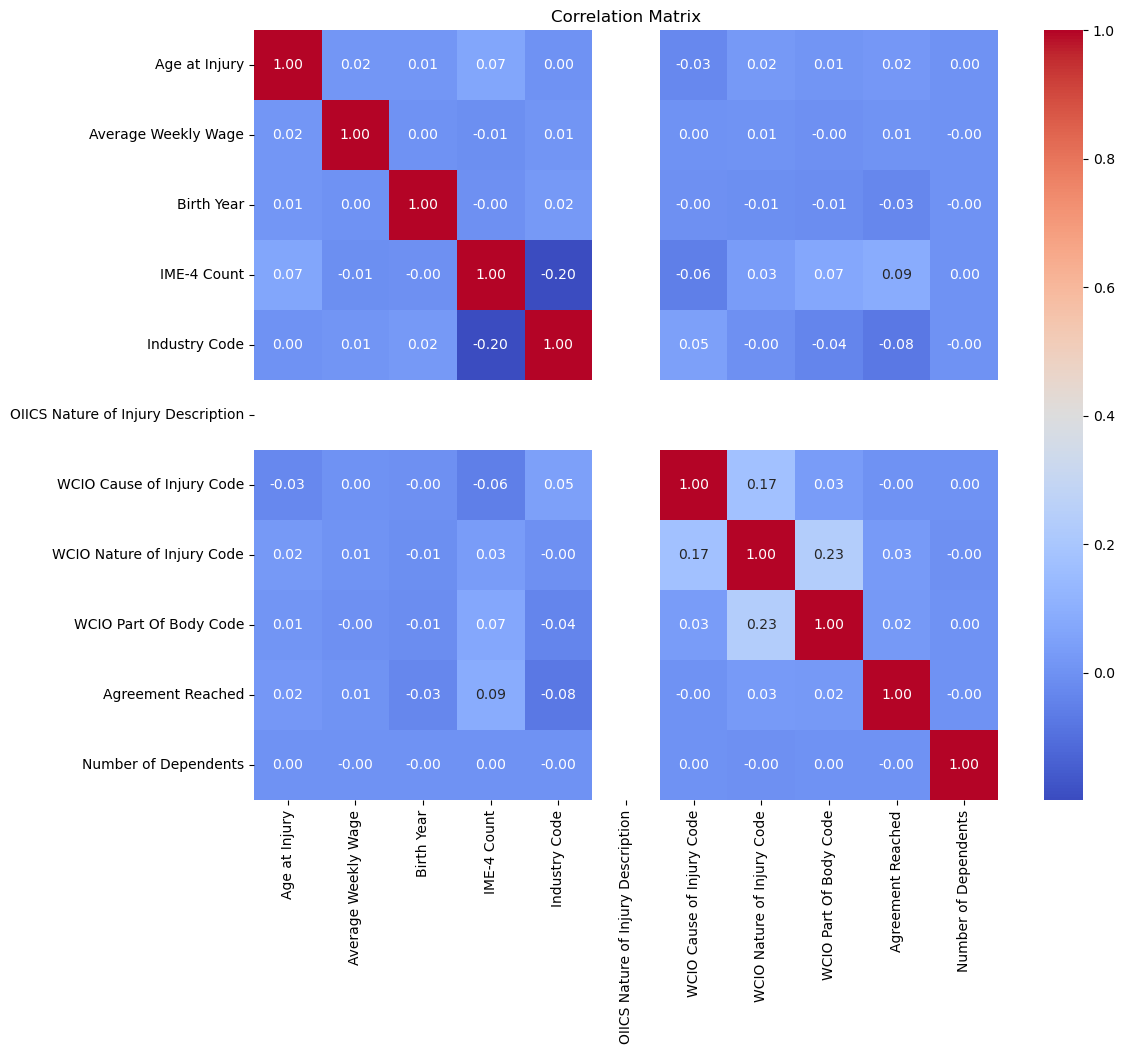

In [37]:
# Filter the dataframe to include only integer and float columns
numeric_train_data = train_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_train_data.corr()

# Plot the correlation matrix using matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

As this heatmap shows, theres not much to say about the correlations between features

#### Outliers

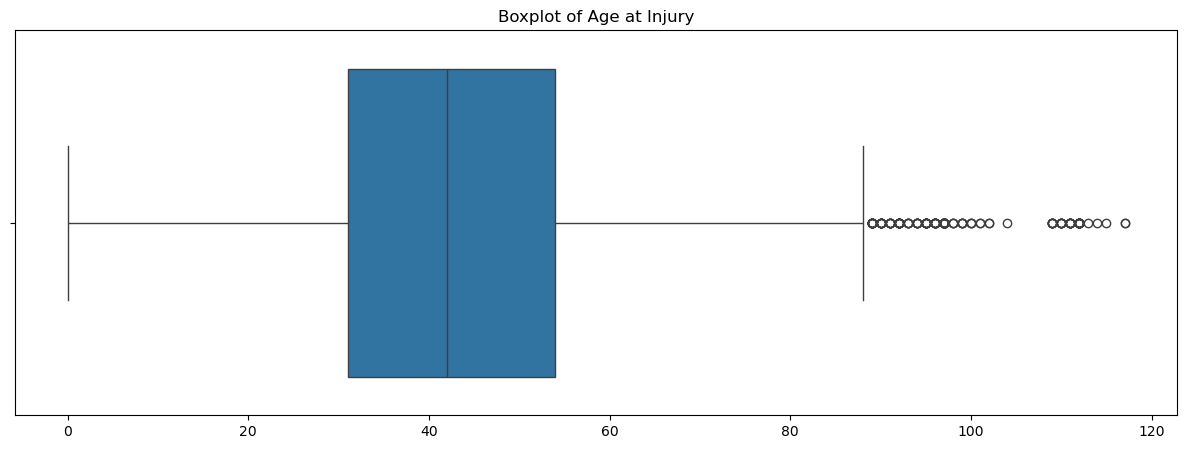

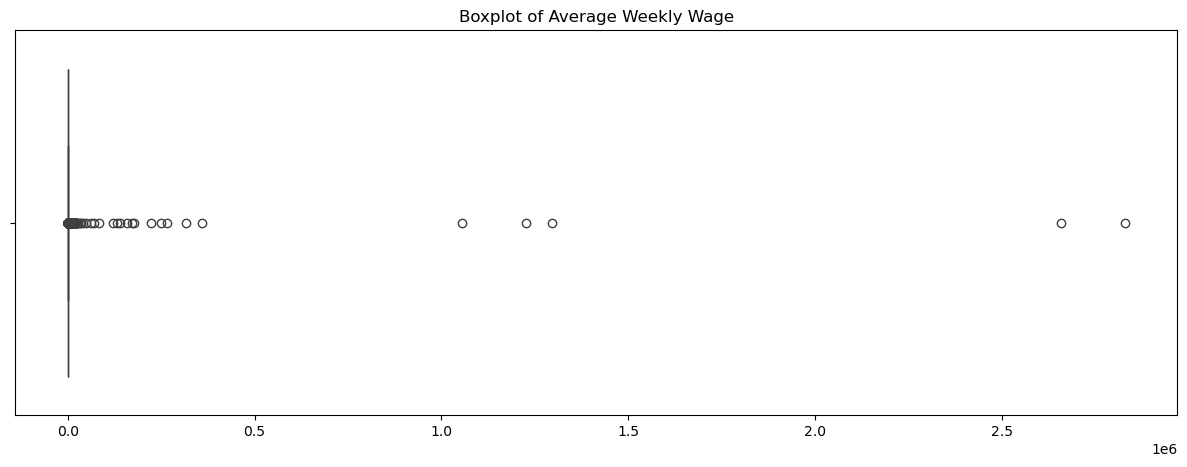

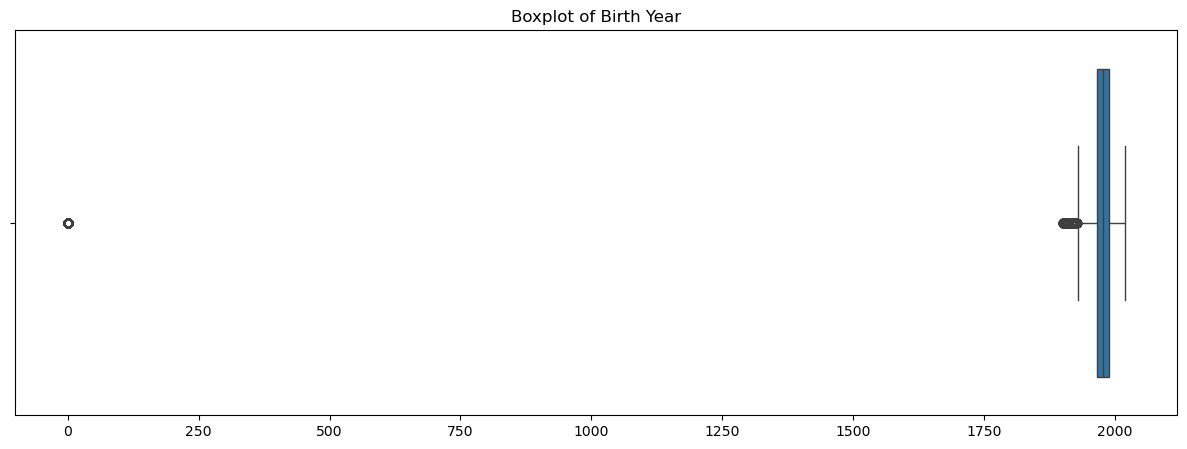

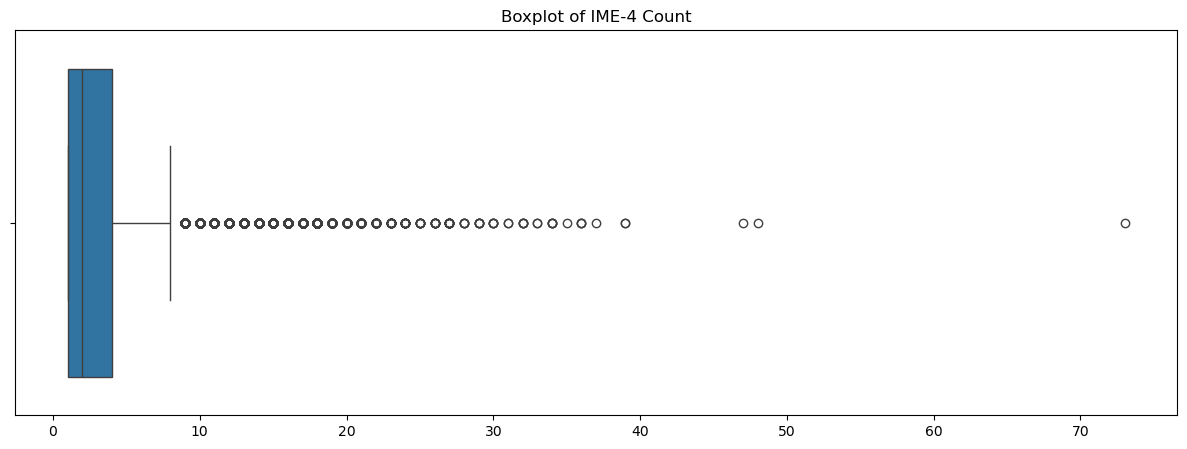

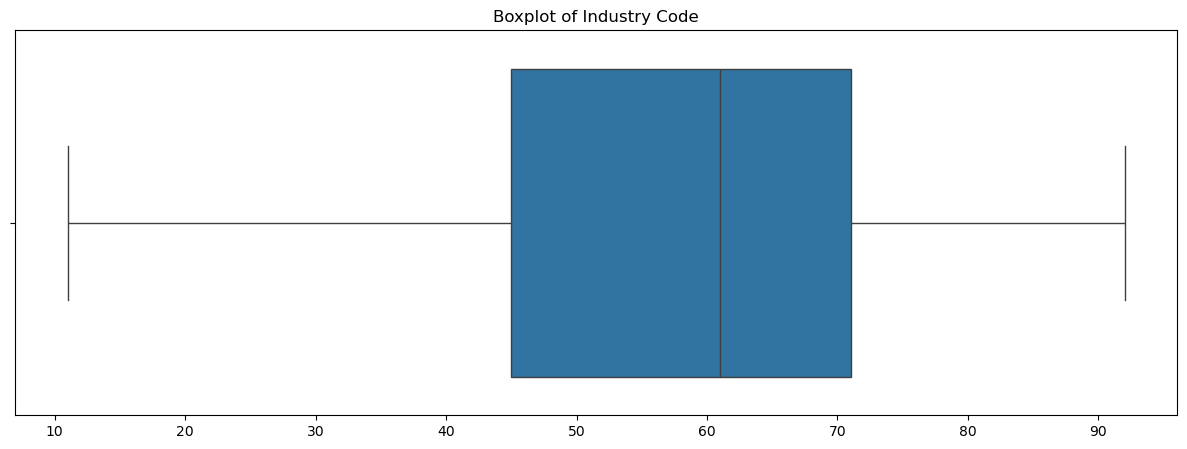

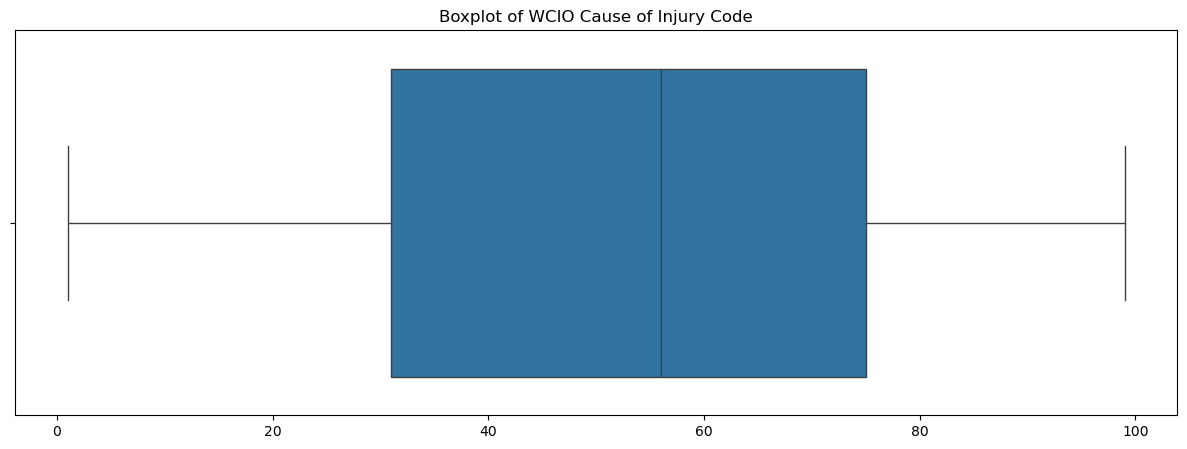

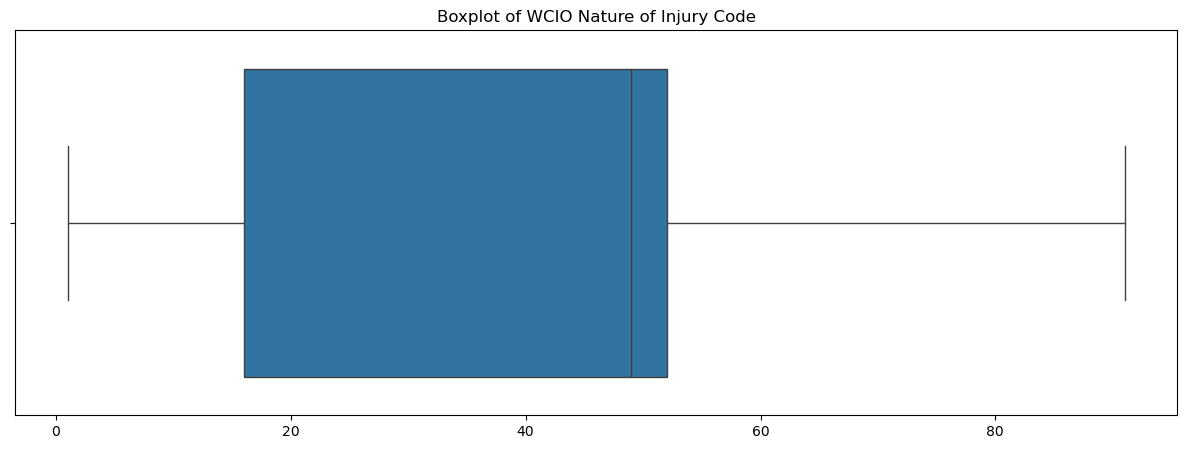

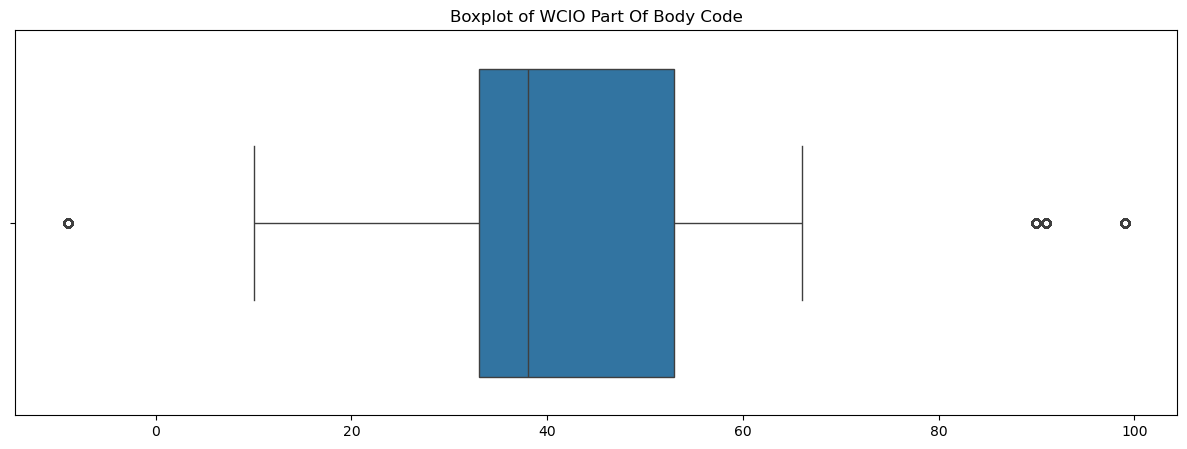

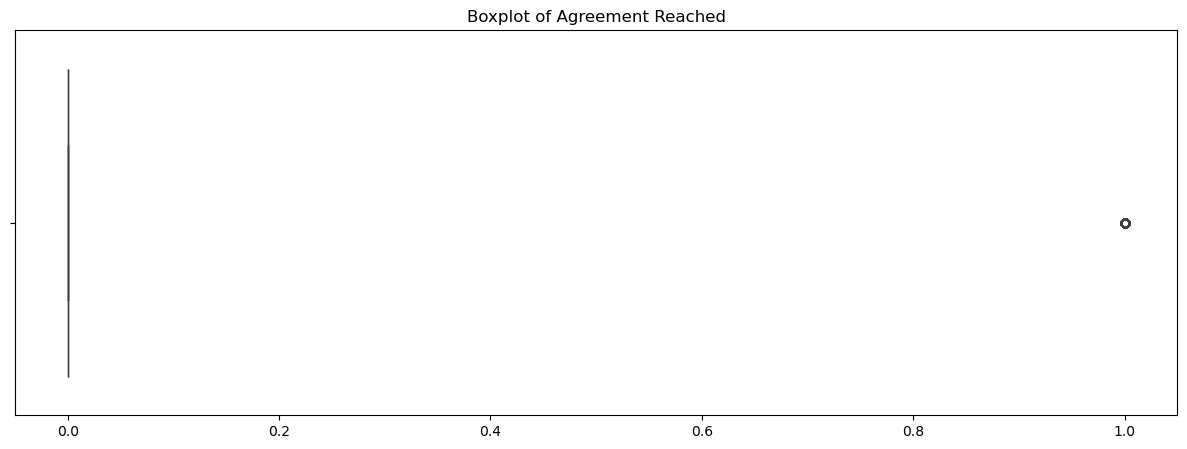

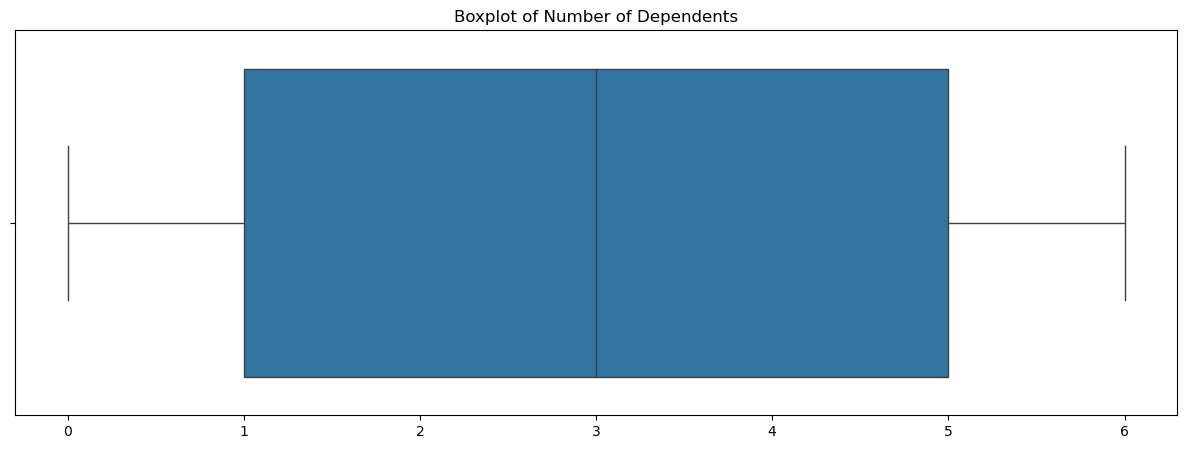

In [38]:
# Remove columns with all NaN values
numeric_train_data = numeric_train_data.dropna(axis=1, how='all')

# Plot each numerical feature in a separate plot
for column in numeric_train_data.columns:
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=numeric_train_data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
    plt.show()


### 2.1.5 Numerical Features - univariate analysis

In [39]:
# numerical features only
num_feat = list(df.select_dtypes(include='number').columns)
print(num_feat)

# remove categorical variable with code
num_feat = [col for col in num_feat if 'Code' not in col]
num_feat = [col for col in num_feat if 'Description' not in col]
num_feat

['Age at Injury', 'Average Weekly Wage', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']


['Age at Injury', 'Average Weekly Wage', 'IME-4 Count', 'Number of Dependents']

#### Age at Injury

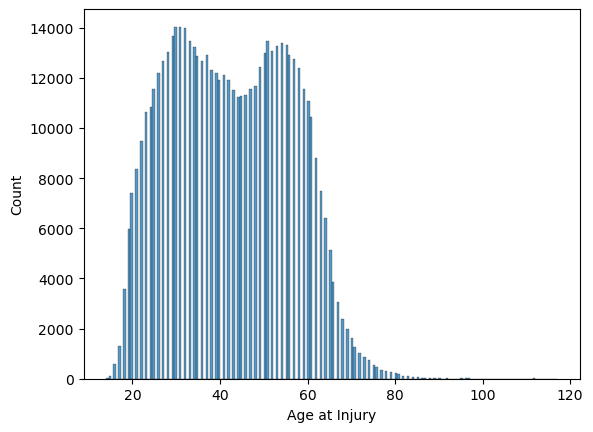

<Axes: ylabel='Age at Injury'>

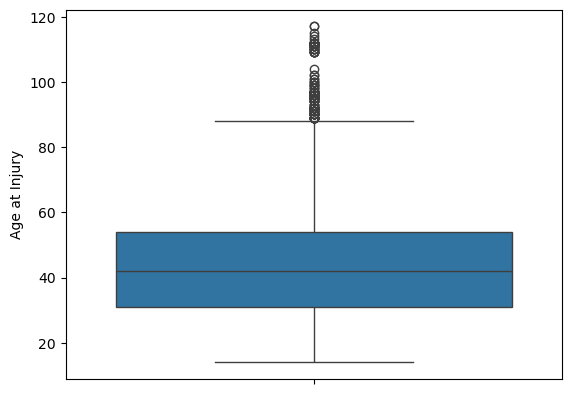

In [40]:
#14 is the minimum age to work in New York
sns.histplot(df[df['Age at Injury'] > 13]['Age at Injury'],)
plt.show()

sns.boxplot(df[df['Age at Injury'] > 13]['Age at Injury'])

#### Average Weekly Wage

We can see that this feature has a lot of outliers that need to be treated further in the project

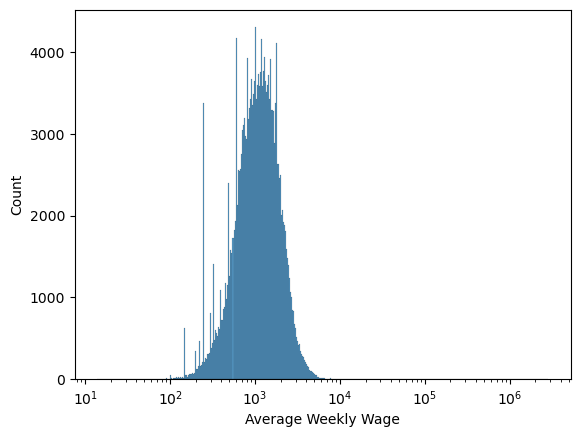

<Axes: ylabel='Average Weekly Wage'>

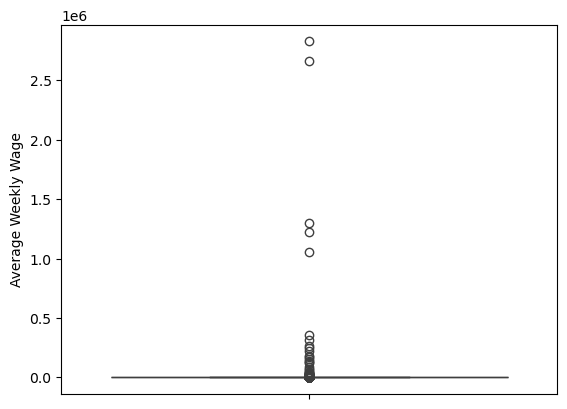

In [41]:
sns.histplot(df['Average Weekly Wage'], log_scale=True)
plt.show()

sns.boxplot(df['Average Weekly Wage'])

Here we can see that the values for Average Weekly Wage seem fine but due to the large amount of zeros, the auto attributed values for the will not work here

In [42]:
print(df['Average Weekly Wage'].describe())

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64


#### Number of Dependents

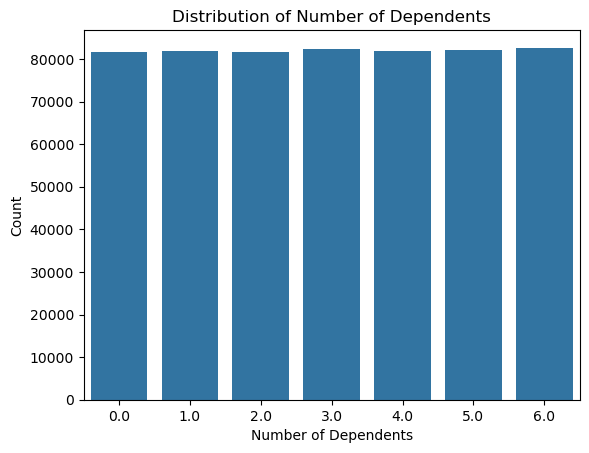

<Axes: ylabel='Number of Dependents'>

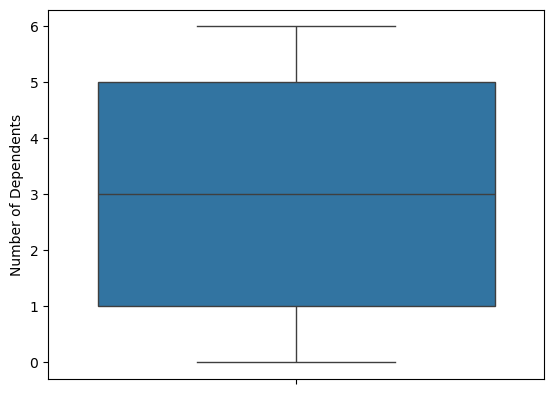

In [43]:
sns.countplot(x='Number of Dependents', data=df)
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Distribution of Number of Dependents')
plt.show()

sns.boxplot(df['Number of Dependents'])

#### IME-4 Count

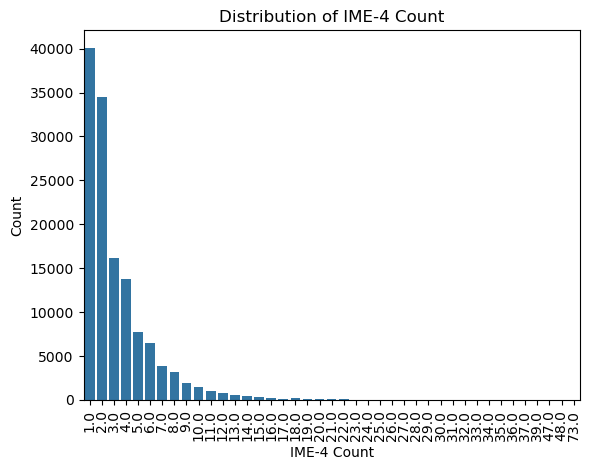

<Axes: ylabel='IME-4 Count'>

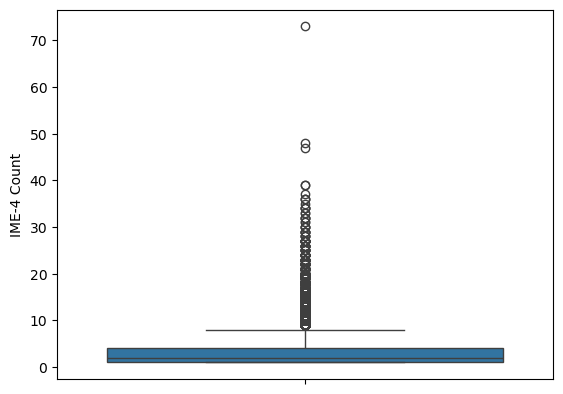

In [44]:
'IME-4 Count'

sns.countplot(x='IME-4 Count', data=df)
plt.xlabel('IME-4 Count')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.title('Distribution of IME-4 Count')
plt.show()

sns.boxplot(df['IME-4 Count'])

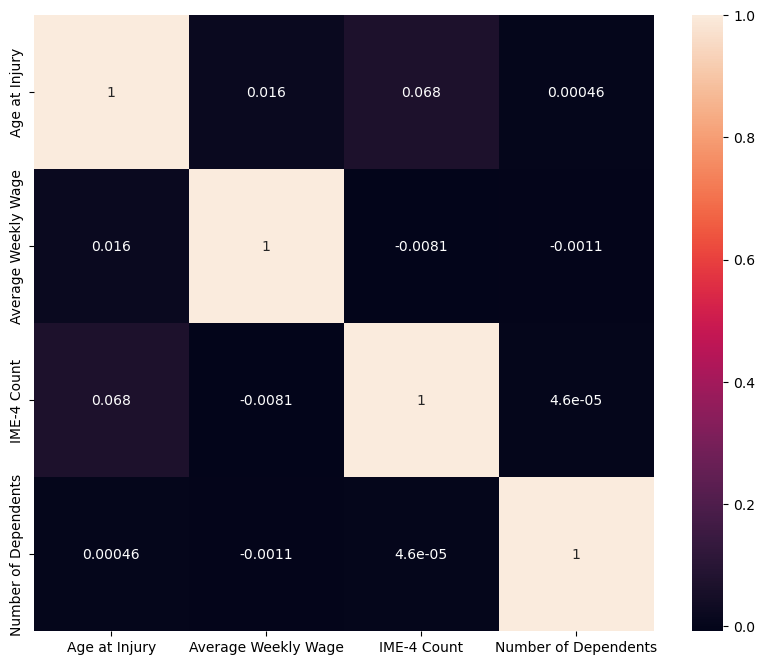

In [45]:
fig = plt.figure(figsize=(10, 8))


corr = df[num_feat].corr(method="pearson")


sns.heatmap(data=corr, annot=True, )


plt.show()

---

### 2.1.6 Categorical Features- Univariate Analysis

In [46]:
# select categorical features
df_cat = df.select_dtypes(include='object').columns.tolist()

# add columns that contain 'Code' or 'Description' in their name
df_cat += [col for col in df.columns if 'Code' in col or 'Description' in col]

# remove any duplicates (in case a column is already in both categories)
df_cat = list(set(df_cat))

df_cat

['County of Injury',
 'Gender',
 'Carrier Type',
 'Industry Code Description',
 'WCIO Cause of Injury Code',
 'WCIO Part Of Body Code',
 'WCB Decision',
 'Medical Fee Region',
 'WCIO Nature of Injury Description',
 'Carrier Name',
 'District Name',
 'WCIO Nature of Injury Code',
 'Zip Code',
 'Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'WCIO Cause of Injury Description',
 'WCIO Part Of Body Description',
 'Industry Code']

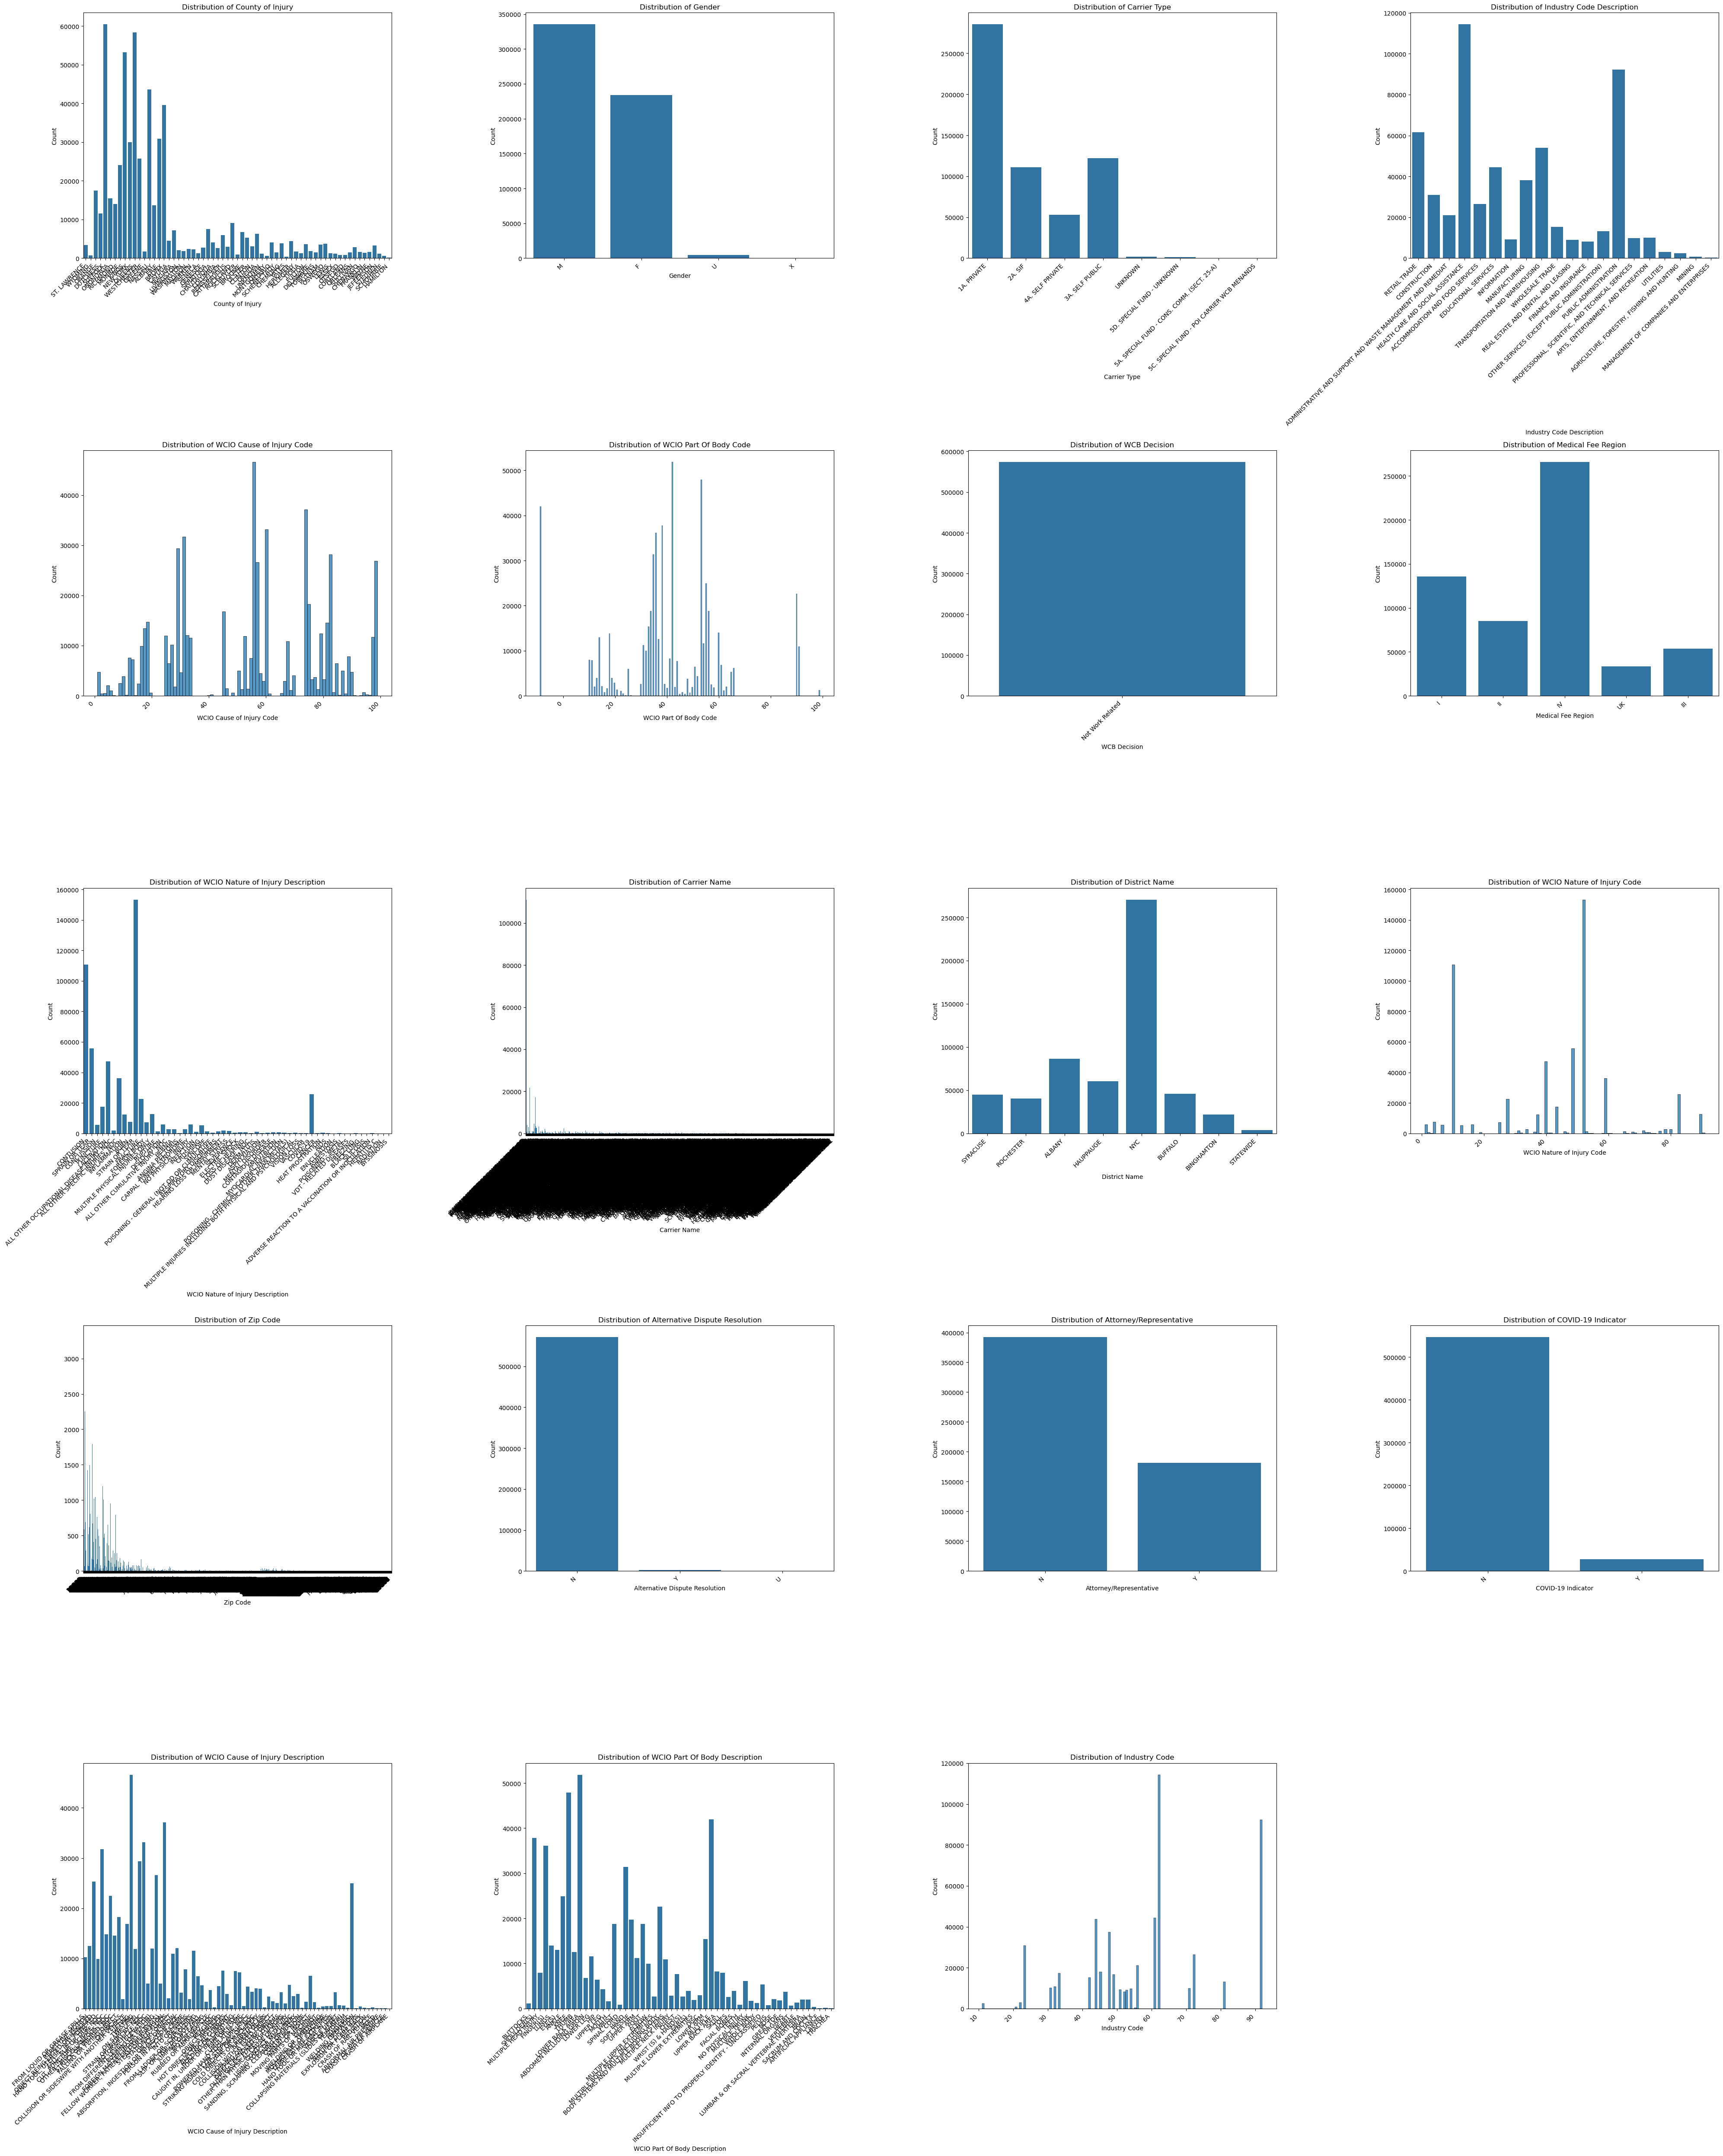

In [47]:
num_vars = len(df_cat)
num_cols = 4
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

plt.figure(figsize=(40, num_rows * 10))
for idx, var in enumerate(df_cat):
    plt.subplot(num_rows, num_cols, idx + 1)
    if train_data[var].dtype == 'object':
        sns.countplot(x=var, data=train_data)
    else:
        sns.histplot(train_data[var], kde=False)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Assembly Date

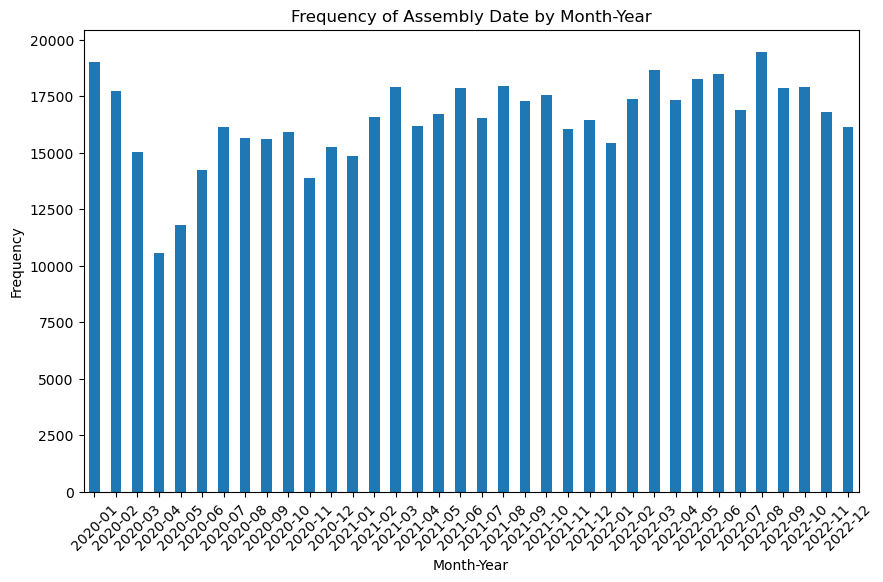

In [48]:
dfc = df.copy()
dfc['Assembly Date'] = pd.to_datetime(dfc['Assembly Date'])  
dfc['year_month'] = dfc['Assembly Date'].dt.to_period('M')  

dfc['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Frequency of Assembly Date by Month-Year')
plt.xticks(rotation=45)
plt.show()


#### Accident Date

In [49]:
dfc = df.copy()
dfc['Accident Date'] = pd.to_datetime(dfc['Accident Date'])  

dfc = dfc[dfc['Accident Date'] >= '1961-01-01']

dfc['year'] = dfc['Accident Date'].dt.year
print(dfc['Accident Date'].min(), dfc['Accident Date'].max())

1961-09-06 00:00:00 2023-09-29 00:00:00


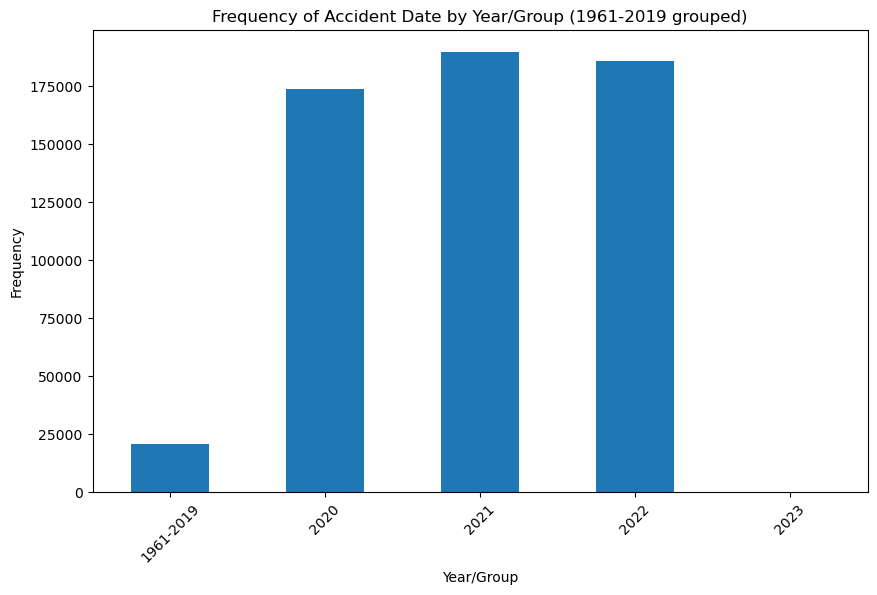

In [50]:
# consider only dates from 1961 onwards (because of the min value on the cell above)
dfc = dfc[dfc['Accident Date'] >= '1961-01-01']

# create a group for the first 59 year due to the low frequency
dfc['year_group'] = dfc['year'].apply(lambda x: '1961-2019' if x <= 2019 else str(x))

# count the frequency of the accident date by year
yearly_grouped_counts = dfc['year_group'].value_counts().sort_index()

# plot the frequency of the accident date by year
yearly_grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year/Group')
plt.ylabel('Frequency')
plt.title('Frequency of Accident Date by Year/Group (1961-2019 grouped)')
plt.xticks(rotation=45)
plt.show()

#### C-2 and C-3 Date

In [51]:
dfc = df.copy()
dfc['C-2 Date'] = pd.to_datetime(dfc['C-2 Date'])  


dfc['year'] = dfc['C-2 Date'].dt.year
print(dfc['C-2 Date'].min(), dfc['C-2 Date'].max())

1996-01-12 00:00:00 2024-06-01 00:00:00


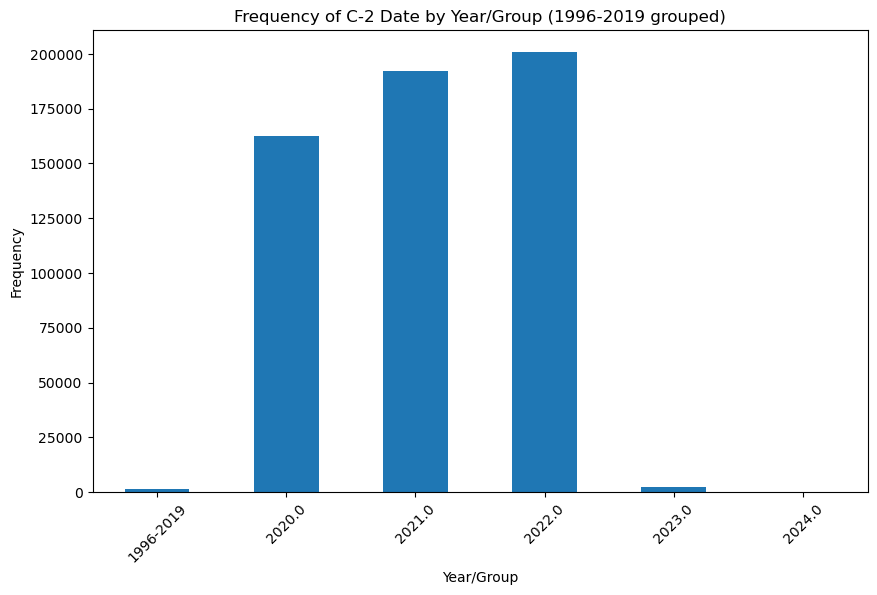

In [52]:
# consider only dates from 1996 onwards (because of the min value on the cell above)
dfc = dfc[dfc['C-2 Date'] >= '1996-01-1']

# create a group for the first 2ish decades due to the low frequency
dfc['year_group'] = dfc['year'].apply(lambda x: '1996-2019' if x <= 2019 else str(x))

# count the frequency of the accident date by year
yearly_grouped_counts = dfc['year_group'].value_counts().sort_index()

# plot the frequency of the accident date by year
yearly_grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year/Group')
plt.ylabel('Frequency')
plt.title('Frequency of C-2 Date by Year/Group (1996-2019 grouped)')
plt.xticks(rotation=45)
plt.show()

In [53]:
dfc = df.copy()

# Convert 'C-2 Date' and 'C-3 Date' to datetime
dfc['C-2 Date'] = pd.to_datetime(dfc['C-2 Date'])
dfc['C-3 Date'] = pd.to_datetime(dfc['C-3 Date'])

print(dfc['C-2 Date'].min(), dfc['C-2 Date'].max())
print(dfc['C-3 Date'].min(), dfc['C-3 Date'].max())


1996-01-12 00:00:00 2024-06-01 00:00:00
1992-11-13 00:00:00 2024-05-31 00:00:00


In [54]:
# consider only dates from 1996 onwards (because of the min value on the cell above) for C-2
dfc_c2 = dfc[dfc['C-2 Date'] >= '1996-01-01']
dfc_c2['year_c2'] = dfc_c2['C-2 Date'].dt.year

# consider only dates from 1992 onwards (because of the min value on the cell above) for C-3
dfc_c3 = dfc[dfc['C-3 Date'] >= '1992-01-01']
dfc_c3['year_c3'] = dfc_c3['C-3 Date'].dt.year


# group from the min year to 2019 and then by year due to the low frequency
dfc_c2['year_group_c2'] = dfc_c2['year_c2'].apply(lambda x: '1996-2019' if x <= 2019 else str(x))
dfc_c3['year_group_c3'] = dfc_c3['year_c3'].apply(lambda x: '1992-2019' if x <= 2019 else str(x))

# Calculate the frequency of the accident date by year group
yearly_grouped_counts_c2 = dfc_c2['year_group_c2'].value_counts().sort_index()
yearly_grouped_counts_c3 = dfc_c3['year_group_c3'].value_counts().sort_index()

C:\Users\inesm\AppData\Local\Temp\ipykernel_16036\4135501934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_c2['year_c2'] = dfc_c2['C-2 Date'].dt.year
C:\Users\inesm\AppData\Local\Temp\ipykernel_16036\4135501934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_c3['year_c3'] = dfc_c3['C-3 Date'].dt.year
C:\Users\inesm\AppData\Local\Temp\ipykernel_16036\4135501934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

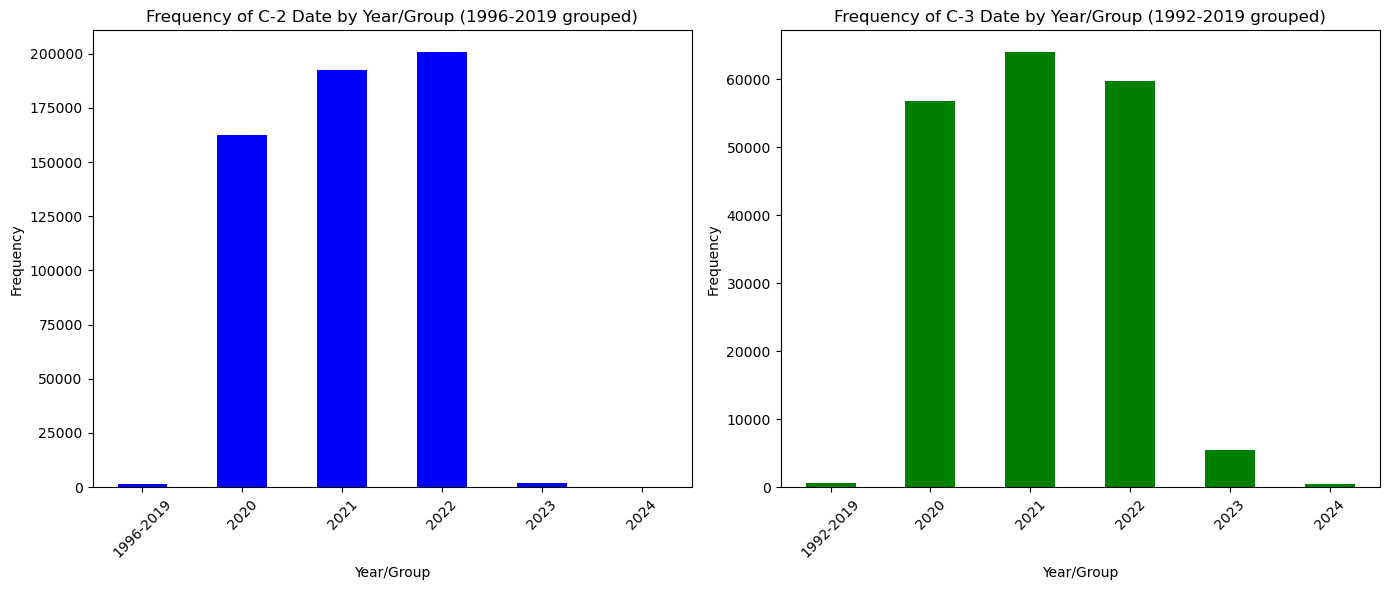

In [55]:
# Plot both graphs side by side using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# plot for C-2 Date
yearly_grouped_counts_c2.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_xlabel('Year/Group')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of C-2 Date by Year/Group (1996-2019 grouped)')
axes[0].tick_params(axis='x', rotation=45)

# plot for C-3 Date
yearly_grouped_counts_c3.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_xlabel('Year/Group')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of C-3 Date by Year/Group (1992-2019 grouped)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### First Hearing Date

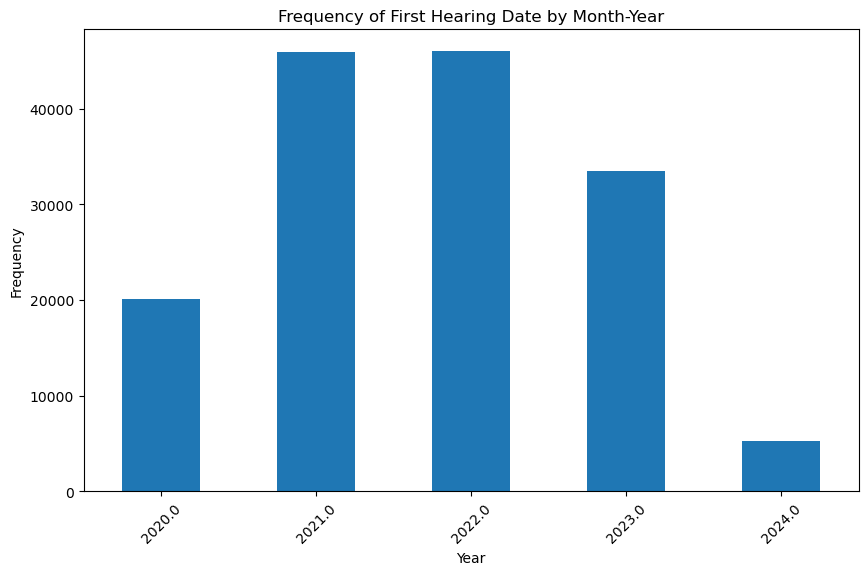

In [56]:
dfc = df.copy()
dfc['First Hearing Date'] = pd.to_datetime(dfc['First Hearing Date'])  
dfc['year'] = dfc['First Hearing Date'].dt.year

dfc['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of First Hearing Date by Month-Year')
plt.xticks(rotation=45)
plt.show()

#### WCB Decision
Oh no, this categorical feature only has one value

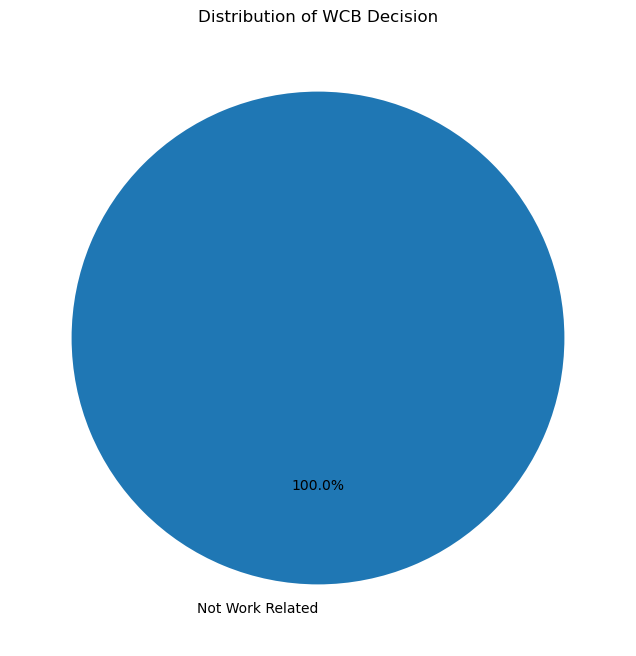

In [57]:
wcb_decision_counts = df['WCB Decision'].value_counts()

plt.figure(figsize=(8, 8))
wcb_decision_counts.plot.pie(autopct='%1.1f%%', startangle=90,)
plt.ylabel('')
plt.title('Distribution of WCB Decision')
plt.show()

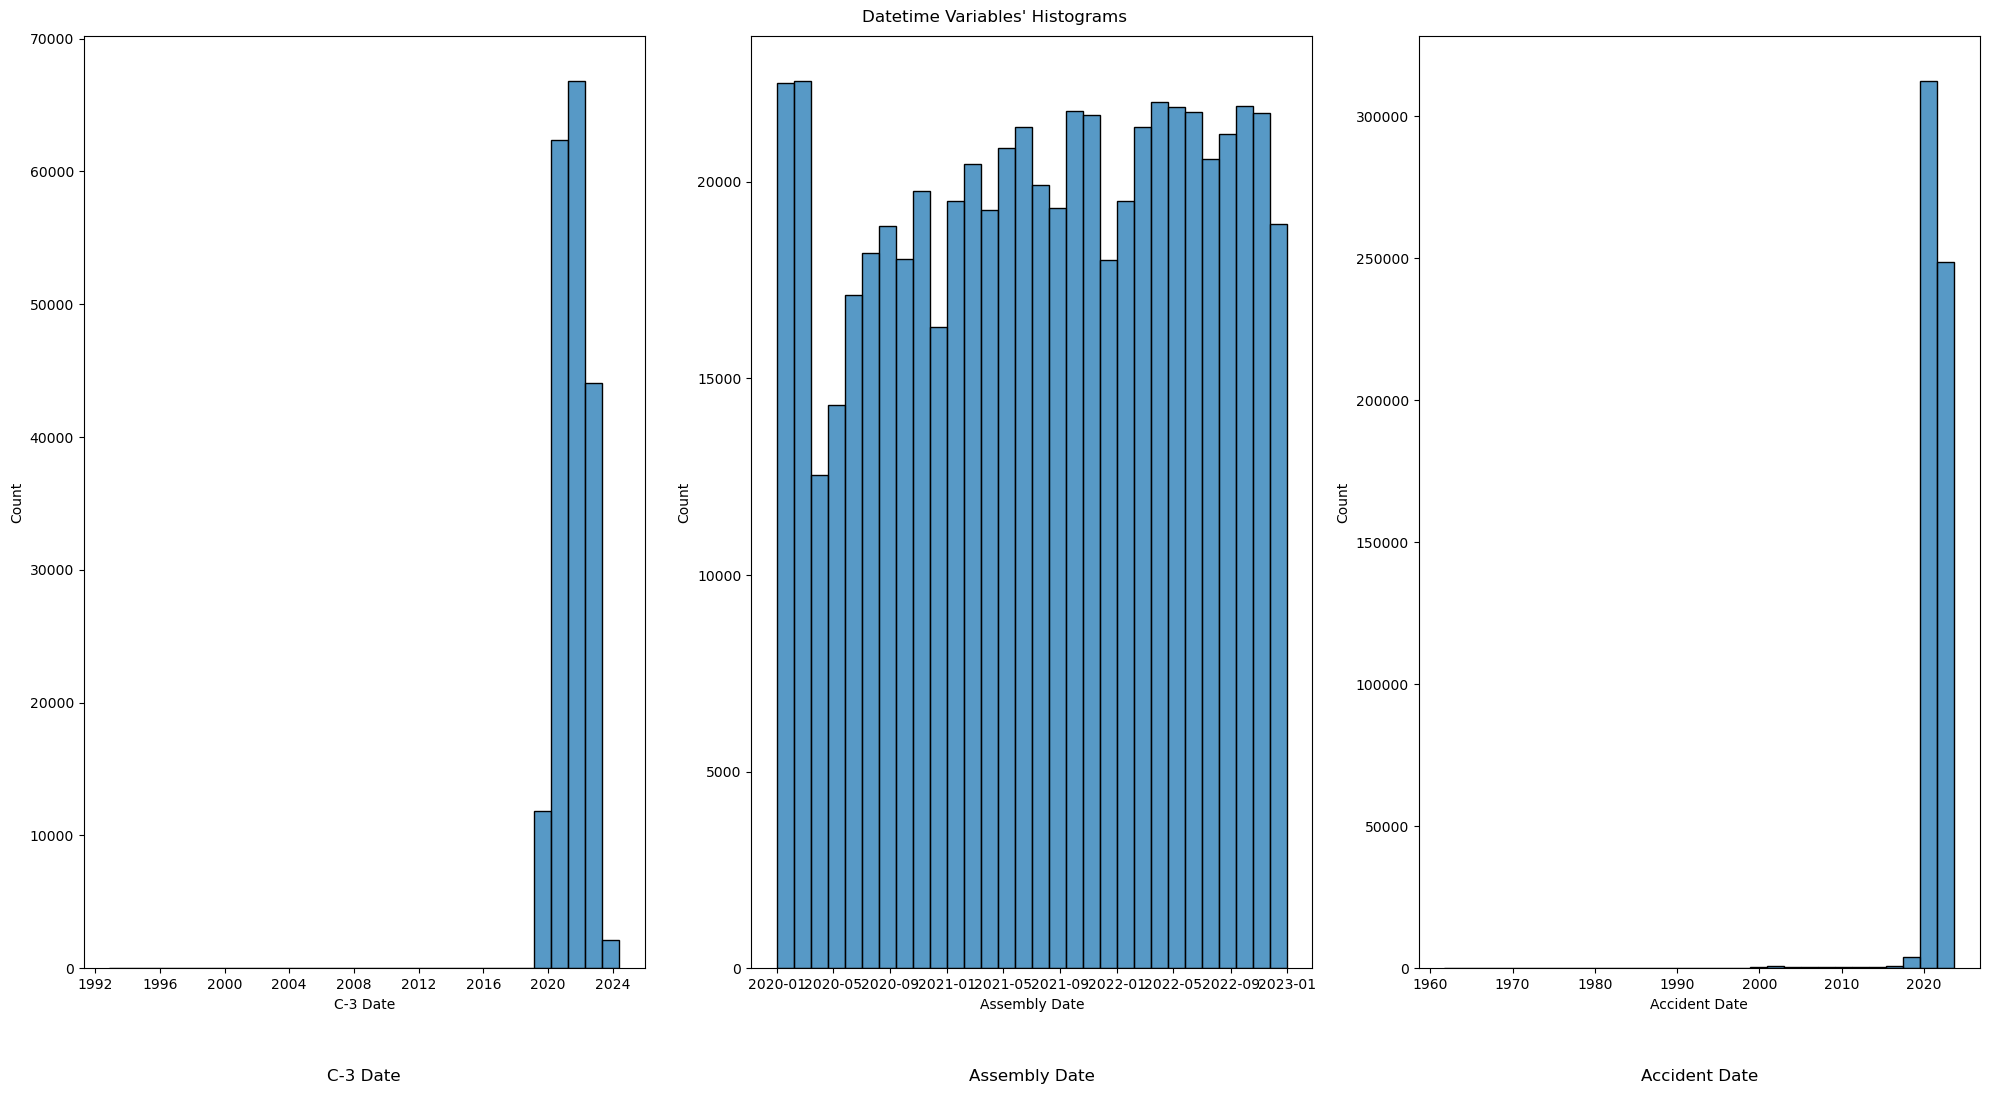

In [58]:
features = ['C-3 Date', 'Assembly Date', 'Accident Date']

# Set up the figure with the specified number of rows and columns
sp_rows = 1
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Plot data
for ax, feat in zip(axes.flatten(), features):
    sns.histplot(df[feat], ax=ax, bins=30)
    ax.set_title(feat, y=-0.13)

title = "Datetime Variables' Histograms"

plt.suptitle(title)
plt.show()

#### Fix Birthday Year Nan


In [59]:
df.isna().sum()

Accident Date                         23134
Age at Injury                         19445
Alternative Dispute Resolution        19445
Assembly Date                             0
Attorney/Representative               19445
Average Weekly Wage                   48096
Birth Year                            73604
C-2 Date                              34005
C-3 Date                             406226
Carrier Name                          19445
Carrier Type                          19445
County of Injury                      19445
COVID-19 Indicator                    19445
District Name                         19445
First Hearing Date                   442673
Gender                                19445
IME-4 Count                          460668
Industry Code                         29403
Industry Code Description             29403
Medical Fee Region                    19445
WCIO Cause of Injury Code             35085
WCIO Cause of Injury Description      35085
WCIO Nature of Injury Code      

In [60]:
if df['Birth Year'].isna().any():
    df['Birth Year'] = df['Accident Date'].dt.year - df['Age at Injury']

df['Birth Year'].isna().sum()

23134

---
# Multivariate Analysis
## Age at Injury vs. Average Weekly Wage


### 2.1.7 Multivariate Analysis

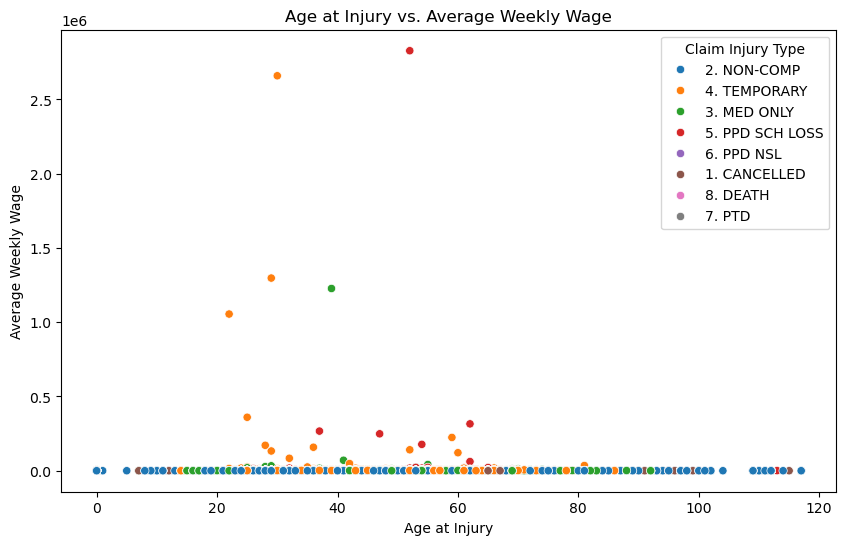

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at Injury', y='Average Weekly Wage', hue='Claim Injury Type', data=train_data)
plt.title('Age at Injury vs. Average Weekly Wage')
plt.xlabel('Age at Injury')
plt.ylabel('Average Weekly Wage')
plt.show()

As we can see there's a lot a values of "Average Weekly Wage" equal to zero, we have to decide what to do wiith it

In [62]:
df[df['Average Weekly Wage']==0].shape[0]

335450

#### Average Weekly Wage by Claim Injury Type


C:\Users\inesm\AppData\Local\Temp\ipykernel_16036\3007533555.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Gender', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)


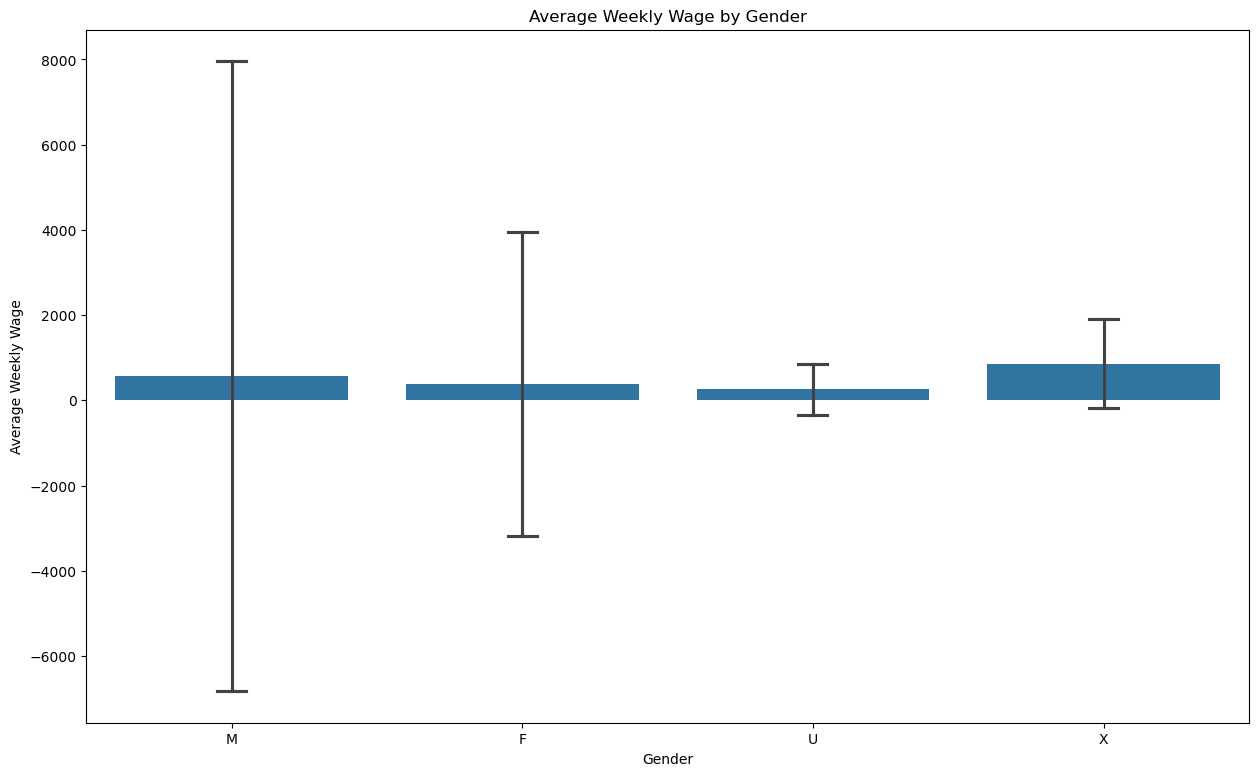

In [63]:
# Average Weekly Wage by Gender
plt.figure(figsize=(15, 9))
sns.barplot(x='Gender', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)
plt.title('Average Weekly Wage by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.show()


Everything that has the feature "Average Weekly Wage" has to be taken "with a grain of salt" because of the amount of zeros

#### Age at Injury by Claim Injury Type

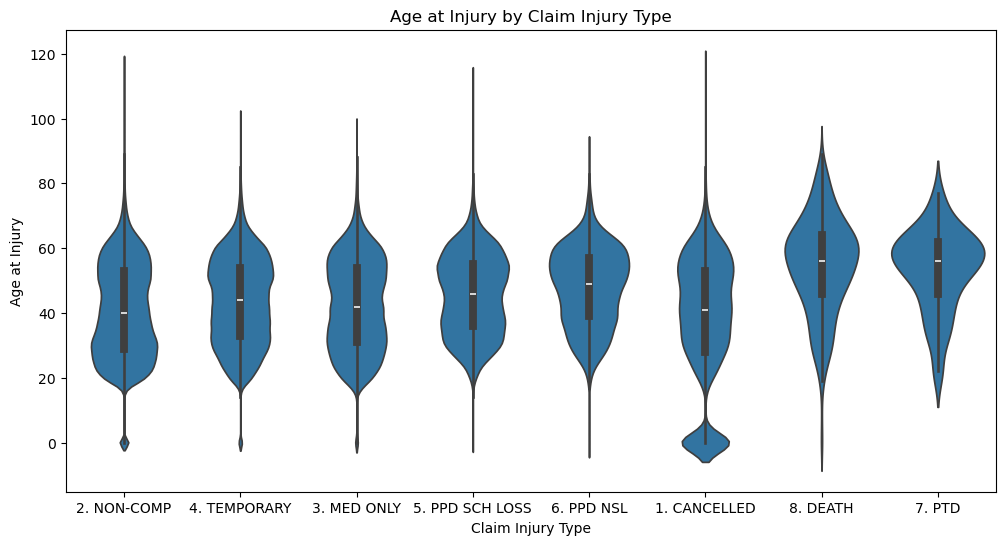

In [64]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Claim Injury Type', y='Age at Injury', data=train_data)
plt.title('Age at Injury by Claim Injury Type')
plt.show()

There is a significante amont of cancelled claims at a young age

#### Stacked Bar Plot for Gender vs. Claim Injury Type

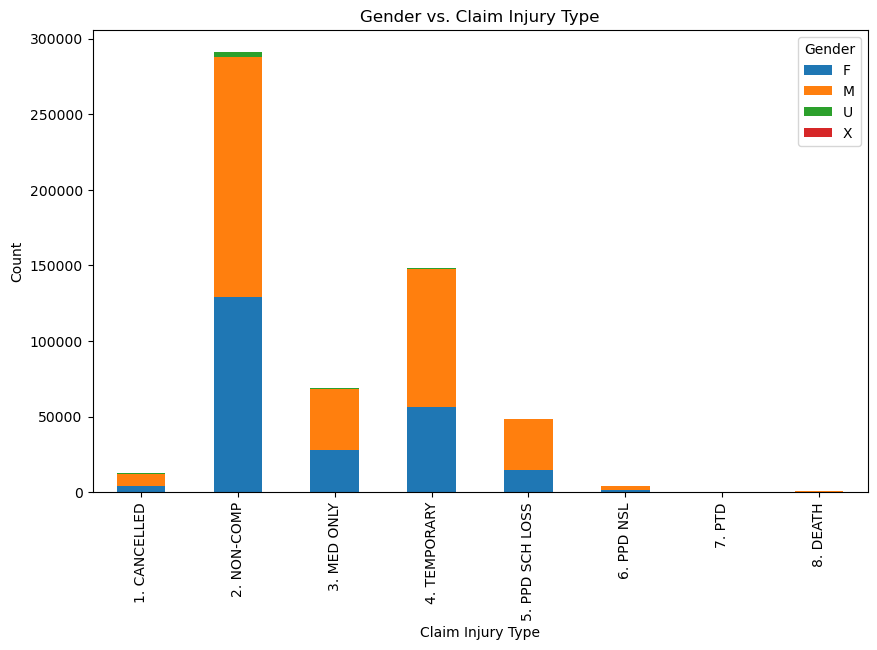

In [65]:
pd.crosstab(train_data['Claim Injury Type'],train_data['Gender']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs. Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.show()

There's only a significant difference in Female and Male in PPD SCH LOSS

#### Gender vs Attorney/Representative

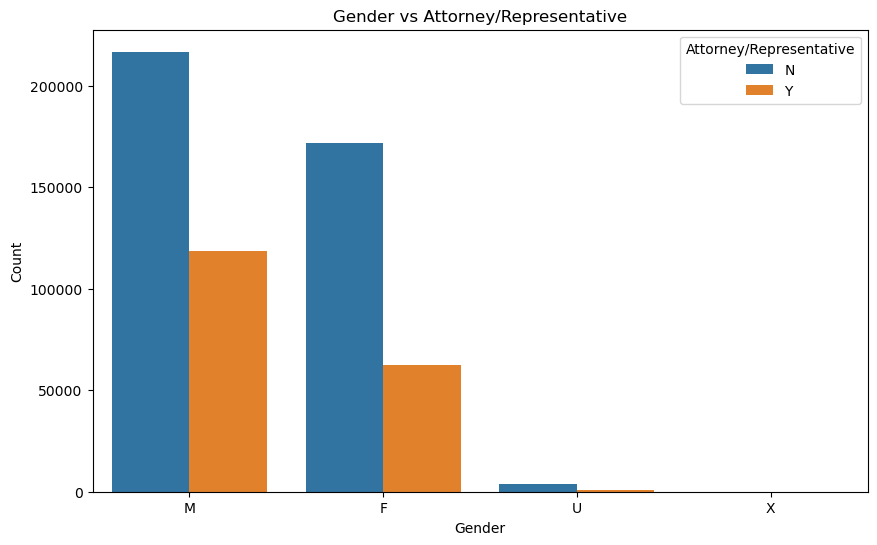

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attorney/Representative', data=train_data)
plt.title('Gender vs Attorney/Representative')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attorney/Representative')
plt.show()


Observation: The proportion is almost the same compared with the amount of M/F/U/X so we cannot say there's descriminations towards a specific gender and the opportunity to have an attorney

#### WCIO Cause of Injury Code by Gender

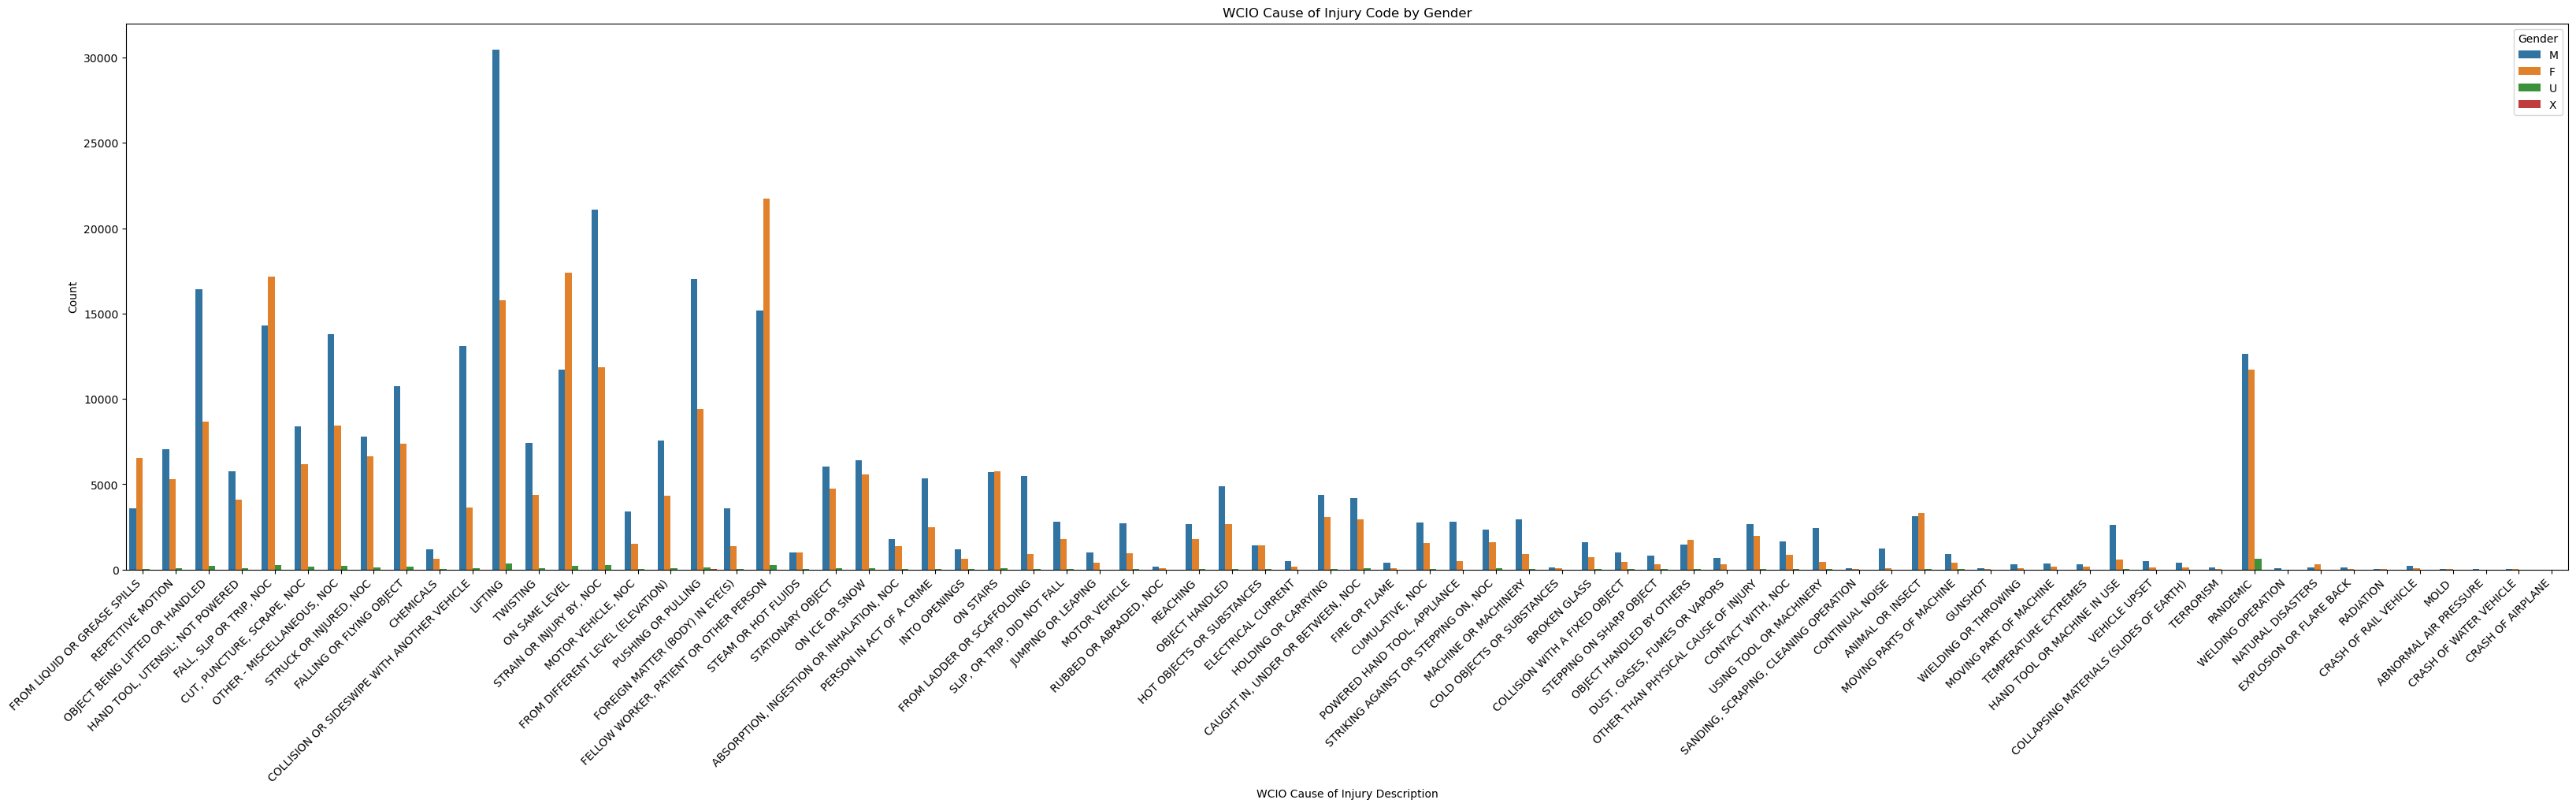

In [67]:
# WCIO Cause of Injury Code by Gender
plt.figure(figsize=(40, 9))
sns.countplot(x='WCIO Cause of Injury Description', hue='Gender', data=train_data)
plt.title('WCIO Cause of Injury Code by Gender')
plt.xlabel('WCIO Cause of Injury Description')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

#### WCIO Part Of Body Description by Claim Injury Type


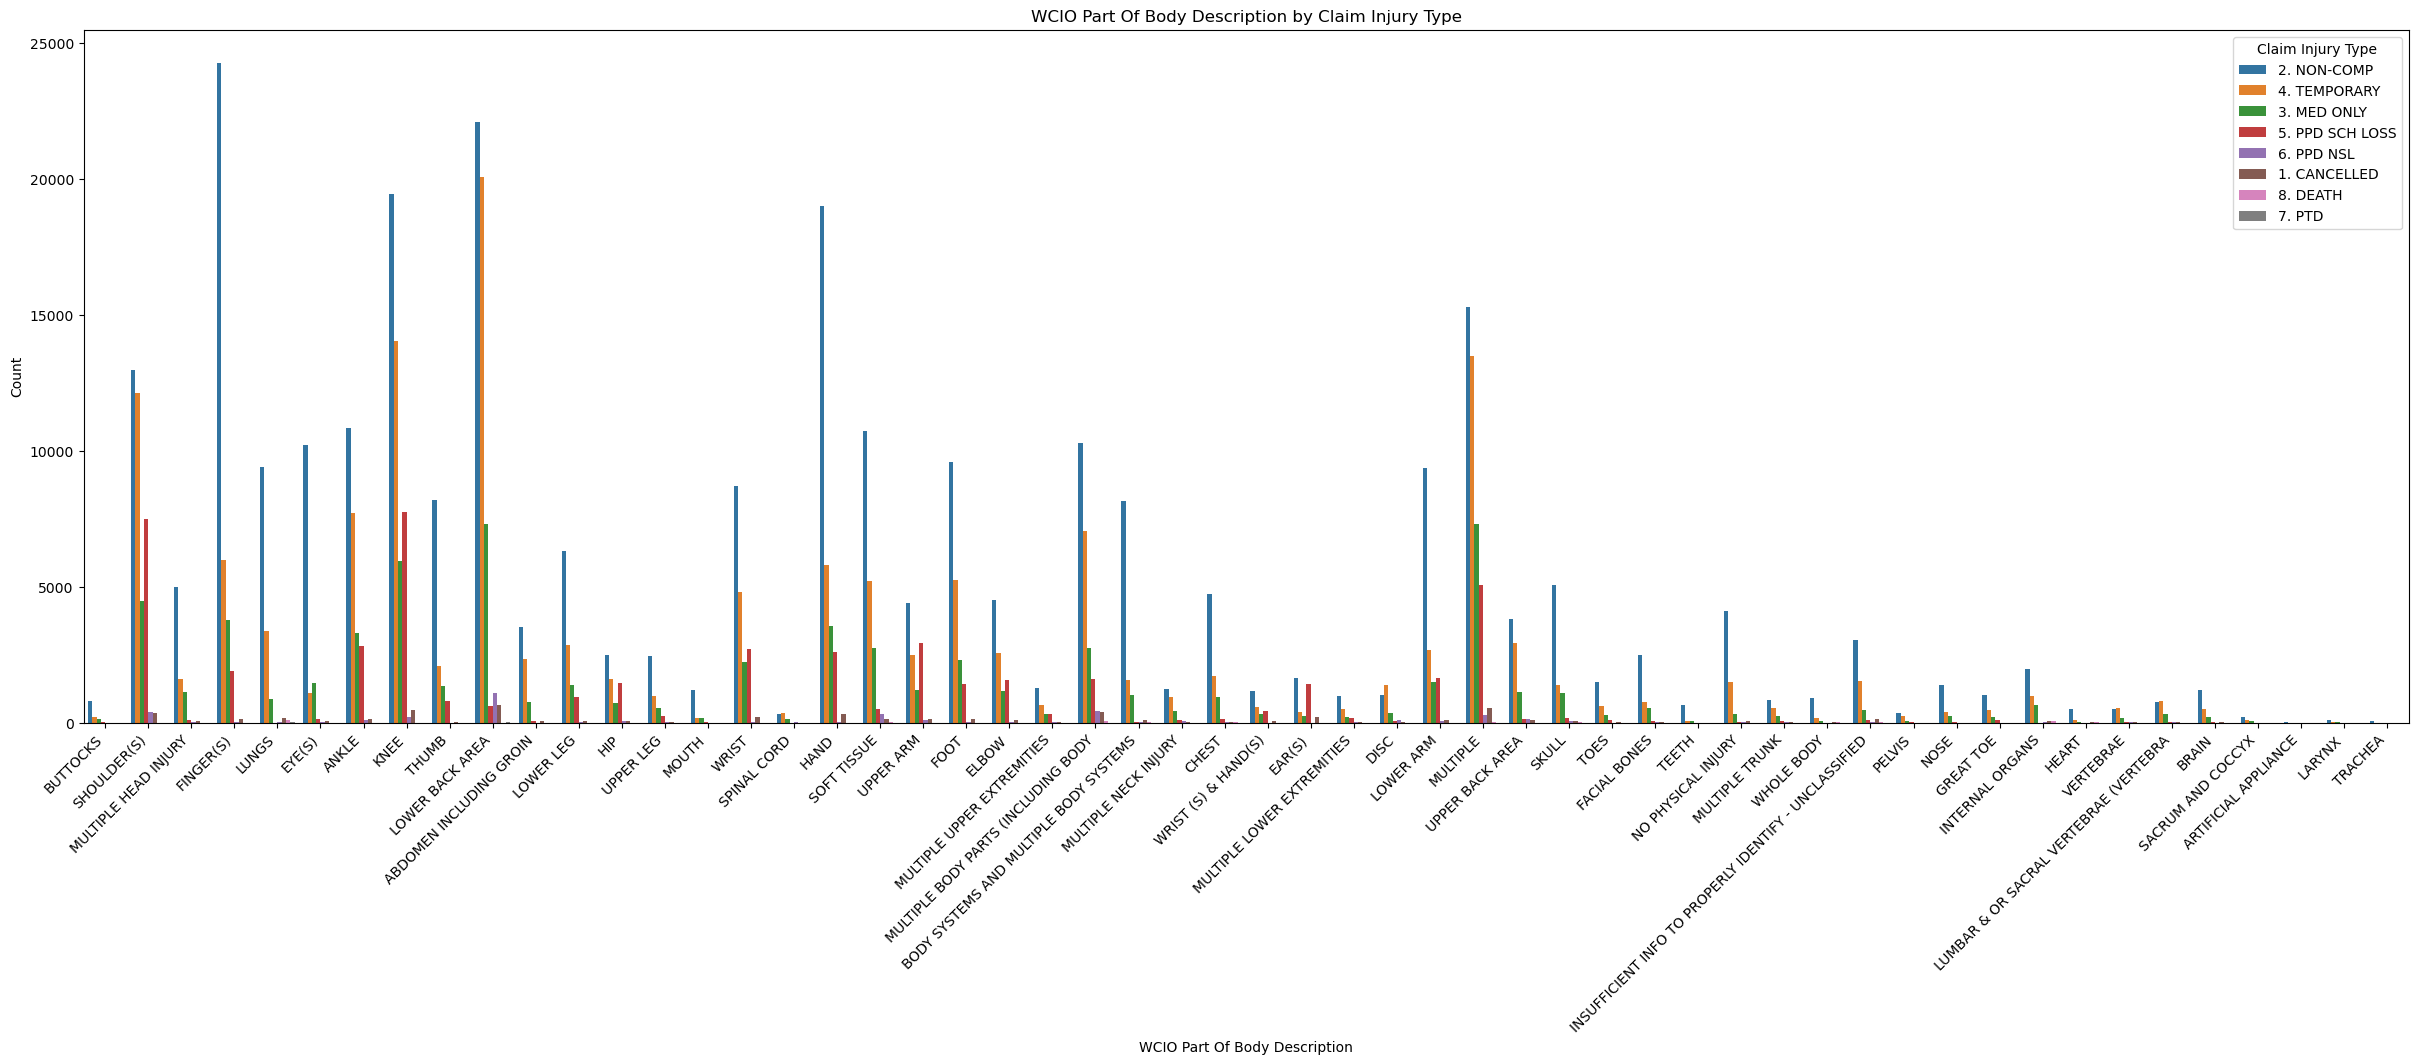

In [68]:
# WCIO Part Of Body Code by Claim Injury Type
plt.figure(figsize=(30, 9))
sns.countplot(x='WCIO Part Of Body Description', hue='Claim Injury Type', data=train_data)
plt.title('WCIO Part Of Body Description by Claim Injury Type')
plt.xlabel('WCIO Part Of Body Description')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Carrier Type by Claim Injury Type

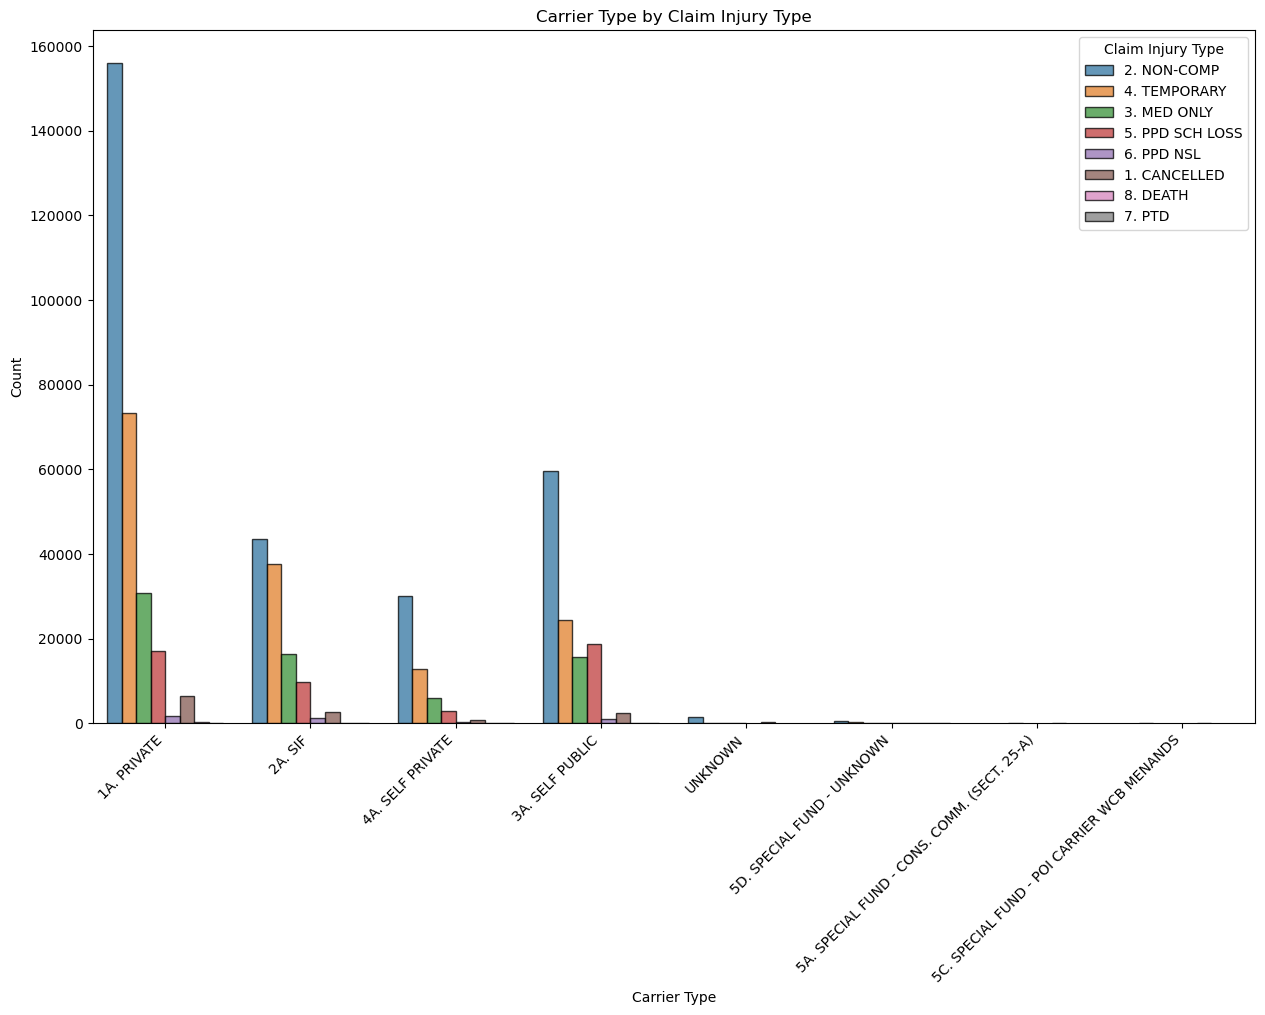

In [69]:
# Carrier Type by Claim Injury Type
plt.figure(figsize=(15, 9))
sns.countplot(x='Carrier Type', hue='Claim Injury Type', data=train_data, alpha=0.75, edgecolor='black')
plt.title('Carrier Type by Claim Injury Type')
plt.xlabel('Carrier Type')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### COVID-19 Indicator by Claim Injury Type

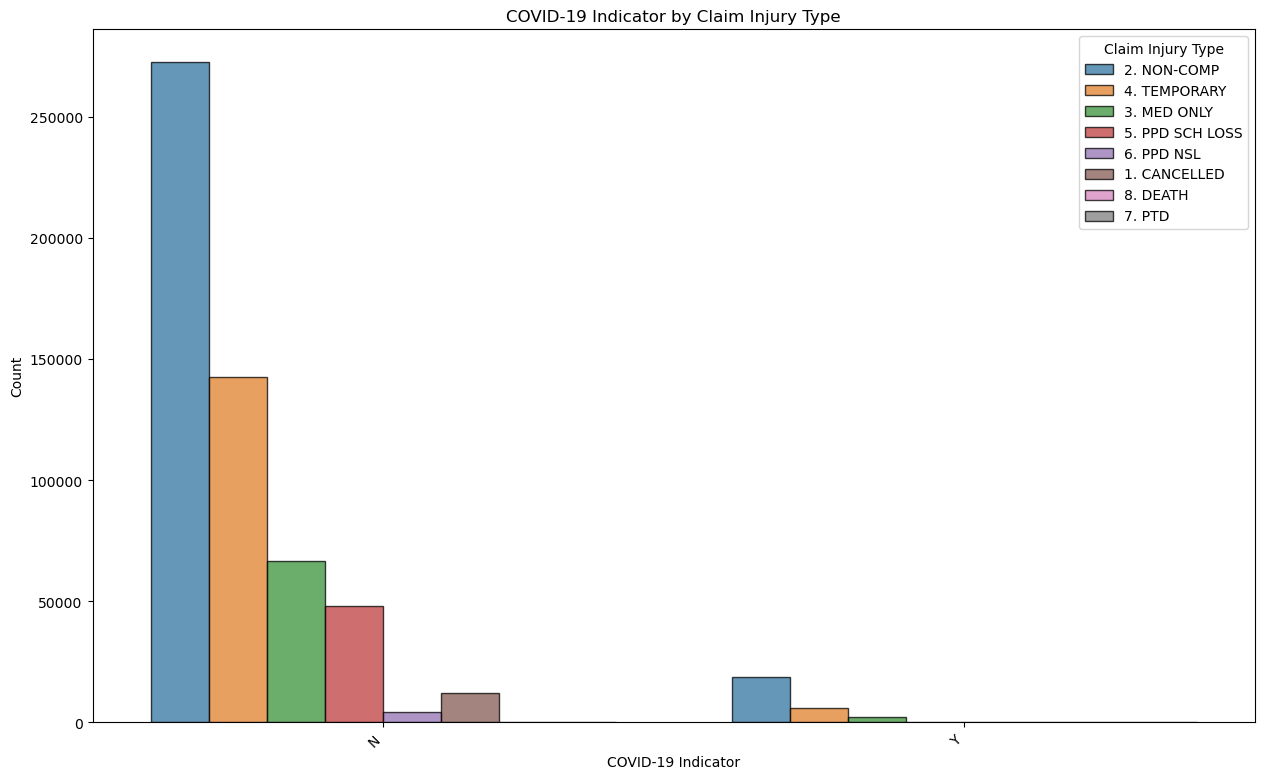

In [70]:
# COVID-19 Indicator by Claim Injury Type
plt.figure(figsize=(15, 9))
sns.countplot(x='COVID-19 Indicator', hue='Claim Injury Type', data=train_data, alpha=0.75, edgecolor='black')
plt.title('COVID-19 Indicator by Claim Injury Type')
plt.xlabel('COVID-19 Indicator')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Average Weekly Wage by Attorney/Representative

C:\Users\inesm\AppData\Local\Temp\ipykernel_16036\269776512.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)


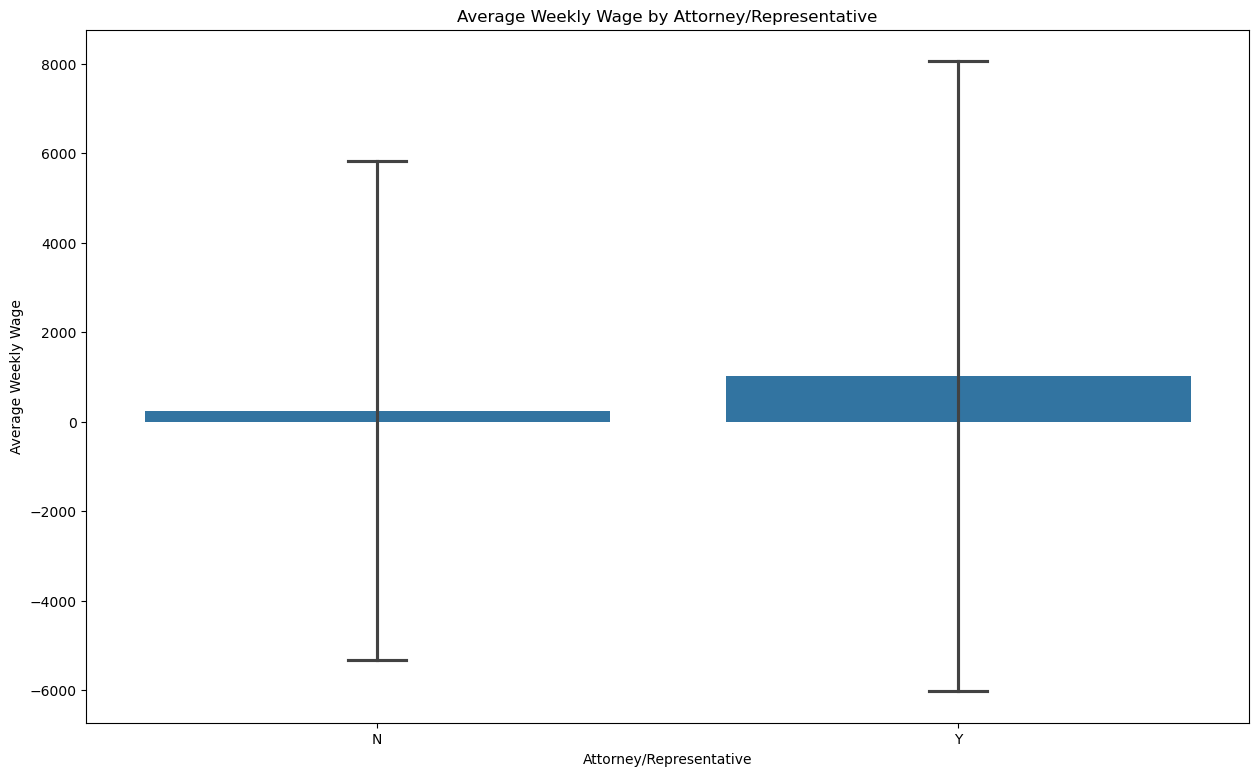

In [71]:
plt.figure(figsize=(15, 9))
sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)
plt.title('Average Weekly Wage by Attorney/Representative')
plt.xlabel('Attorney/Representative')
plt.ylabel('Average Weekly Wage')
plt.show()


#### Pairwise Relationship of Numerical Variables

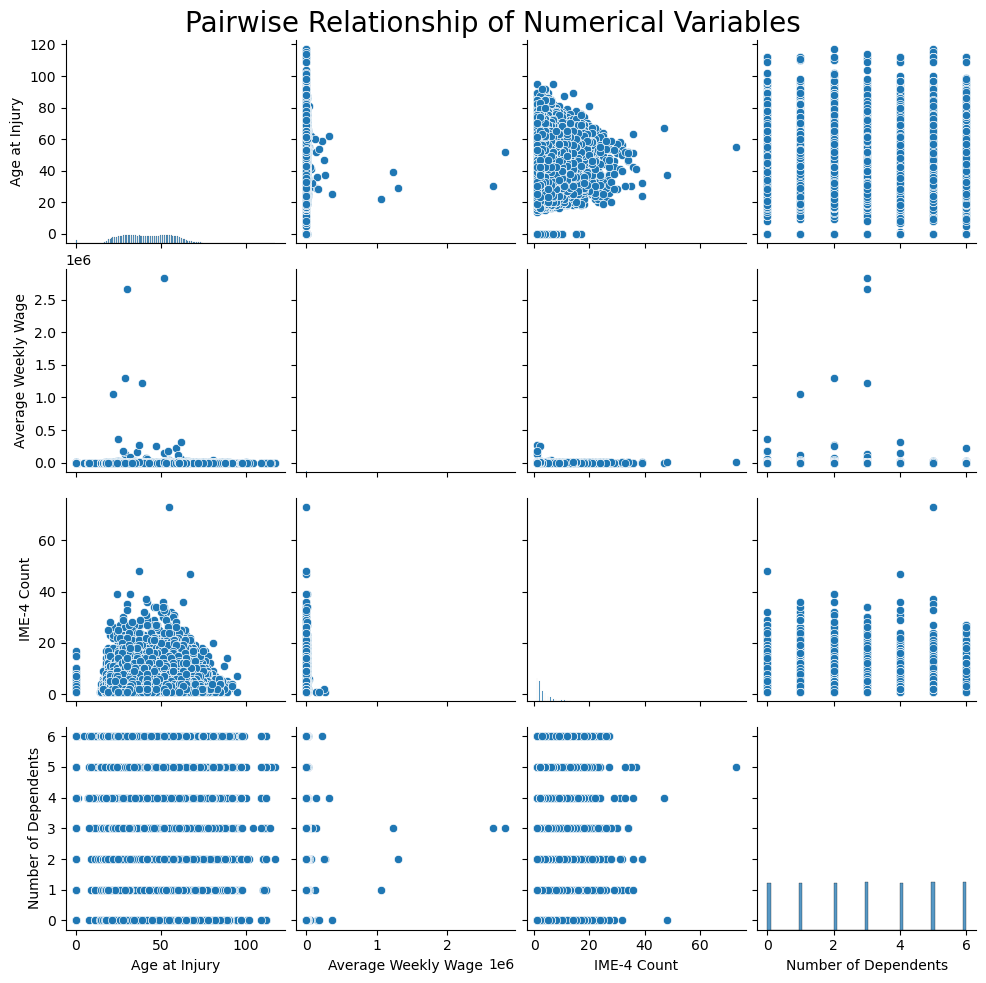

In [72]:
sns.pairplot(train_data[num_feat], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

---

### 2.1.8 Feature Engineering

## 3. Data Preprocessing

In [73]:
X_train = train_data.drop(columns=['Claim Injury Type'])
y_train = train_data['Claim Injury Type']


----

### Empty rows
In the initial analysis we saw that the only features that has no missing values is `_Assembly Date_`. So let's check how many rows only have that feature filled and the rest of columns empty

In [74]:
X_train.drop(columns=['Assembly Date']).isna().all(axis=1).sum()


19445

In [75]:
X_train = train_data[~(train_data.drop(columns=['Assembly Date']).isna().all(axis=1) & train_data['Assembly Date'].notna())]
X_test = test_data[~(test_data.drop(columns=['Assembly Date']).isna().all(axis=1) & test_data['Assembly Date'].notna())]

In [76]:
X_train.drop(columns=['Assembly Date']).isna().all(axis=1).sum()


0

Here 19445 empty rows were dropped


----

# Overlook of the features
This notebook will include pre processing of the following variables:
- Carrier Name 
- Attorney Representative
- OIICS Nature of Injury Description
- Industry Code
- Industry Code Description
- Medical Fee Region
- C-2 Date
- First Hearing Date
- WCIO Cause of Injury Description
- WCIO Cause of Injury Code
- WCIO Part of Body Code
- WCIO Part of Body Description
- WCIO Cause of Injury Code
- WCIO Cause of Injury Description
- WCIO Nature of Injury Description
- WCIO Nature of Injury Code

Since we dropped some rows in the previous section we should check again for the updated number of missing values for the features we are interest in

In [77]:
target_features = ['Carrier Name', 'Attorney/Representative', 'OIICS Nature of Injury Description', 
                   'Industry Code','Industry Code Description', 'Medical Fee Region', 'C-2 Date', 'First Hearing Date','WCIO Cause of Injury Code','WCIO Cause of Injury Description',
                   'WCIO Part Of Body Code','WCIO Part Of Body Description','WCIO Cause of Injury Description','WCIO Cause of Injury Code','WCIO Nature of Injury Description',]

In [78]:
X_train[target_features].isnull().sum()/X_train.shape[0]*100

Carrier Name                            0.000000
Attorney/Representative                 0.000000
OIICS Nature of Injury Description    100.000000
Industry Code                           1.734765
Industry Code Description               1.734765
Medical Fee Region                      0.000000
C-2 Date                                2.536470
First Hearing Date                     73.729761
WCIO Cause of Injury Code               2.724615
WCIO Cause of Injury Description        2.724615
WCIO Part Of Body Code                  2.975823
WCIO Part Of Body Description           2.975823
WCIO Cause of Injury Description        2.724615
WCIO Cause of Injury Code               2.724615
WCIO Nature of Injury Description       2.727577
dtype: float64

The features _`Carrier Name`_,  _`Attorney/Representative`_ and _`Medical Fee Region`_ no longer have missing values. Let's look at the others

### OIICS Nature of Injury Description
Between all the complains this feature is never filled, so we can drop it

In [79]:
# drop OIICS Nature of Injury Description
X_train = X_train.drop(columns=['OIICS Nature of Injury Description'])
X_test = X_test.drop(columns=['OIICS Nature of Injury Description'])

### First Hearing Date
This feature also has a high percentage of missing values. According to the provided information for this project, 'A blank date means the claim has not yet had a hearing held'. So we should create a label for the ones that hadn't had a hearing yet, we will simply call it 'N/A'

In [80]:
# transform First Hearing Date into pd.datetime
X_train['First Hearing Date'] = pd.to_datetime(X_train['First Hearing Date'])
X_test['First Hearing Date'] = pd.to_datetime(X_test['First Hearing Date'])

In [81]:
# fill NA with 'N/A'
X_train['First Hearing Date'] = X_train['First Hearing Date'].fillna('N/A')
X_test['First Hearing Date'] = X_test['First Hearing Date'].fillna('N/A')
X_train['First Hearing Date'].isna().sum()

0

To assist in the information that this feature can provide we can create another feature called _`Has First Hearing Date`_ - a binary value that indicates if the user has had it's first hearing date

In [82]:
# create Has First Hearing Date based on if is 'N/A' or not
X_train['Has First Hearing Date'] = X_train['First Hearing Date'].apply(lambda x: 0 if x == 'N/A' else 1)
X_test['Has First Hearing Date'] = X_test['First Hearing Date'].apply(lambda x: 0 if x == 'N/A' else 1)

In [83]:
X_train['Has First Hearing Date'].value_counts()

Has First Hearing Date
0    423228
1    150798
Name: count, dtype: int64

### C-2 Date
Here we can use the same approach filling the NaNs with N/A

In [84]:
X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'])
X_test['C-2 Date'] = pd.to_datetime(X_test['C-2 Date'])

X_train['C-2 Date'] = X_train['C-2 Date'].fillna('N/A')
X_test['C-2 Date'] = X_test['C-2 Date'].fillna('N/A')


### Codes and Descriptions
This section will analyse data related to codes and their descriptions

In [85]:
df_codes = X_train[[col for col in X_train.columns if 'Code' in col]]
df_codes.drop(columns=['Industry Code Description', 'Zip Code'], inplace=True)

df_description = X_train[[col for col in X_train.columns if 'Description' in col]]

C:\Users\inesm\AppData\Local\Temp\ipykernel_16036\3732407763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_codes.drop(columns=['Industry Code Description', 'Zip Code'], inplace=True)


In [86]:
# ensure that all codes are objects
df_codes = df_codes.astype('object')

df_codes.describe()

Industry Code  WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
count        564068.0                   558386.0                    558369.0   
unique           24.0                       77.0                        56.0   
top              62.0                       56.0                        52.0   
freq         114339.0                    46610.0                    153373.0   

        WCIO Part Of Body Code  
count                 556944.0  
unique                    57.0  
top                       42.0  
freq                   51862.0

In [87]:
#check the order of the codes
df_codes.columns

Index(['Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'],
      dtype='object')

In [88]:
#check the order of the descriptions
df_description.columns

Index(['Industry Code Description', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'],
      dtype='object')

In [89]:
def code_description_consistency(df, code_column, description_column):
    """
    Checks the one-to-one consistency between a code and description column in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - code_column (str): The name of the column representing codes.
    - description_column (str): The name of the column representing descriptions.
    
    Returns:
    - tuple: A tuple with two boolean values:
        - codes_match_descriptions (bool): True if each code has a unique description.
        - descriptions_match_codes (bool): True if each description has a unique code.
    """
    # Remove rows with missing values in either the code or description columns
    df_non_null = df.dropna(subset=[code_column, description_column])

    # Check if each code maps to a unique description
    code_consistency = df_non_null.groupby(code_column)[description_column].nunique() == 1

    # Check if each description maps to a unique code
    description_consistency = df_non_null.groupby(description_column)[code_column].nunique() == 1

    # Check overall consistency
    codes_match_descriptions = code_consistency.all()
    descriptions_match_codes = description_consistency.all()

    return codes_match_descriptions, descriptions_match_codes

In [90]:
for code_col, desc_col in zip(df_codes.columns, df_description.columns):
    # Get the consistency check result
    result = code_description_consistency(X_train, code_col, desc_col)
    
    # Print the names of the columns along with the result
    print(f"Checking consistency between '{code_col}' and '{desc_col}': {result}")

Checking consistency between 'Industry Code' and 'Industry Code Description': (True, False)
Checking consistency between 'WCIO Cause of Injury Code' and 'WCIO Cause of Injury Description': (True, False)
Checking consistency between 'WCIO Nature of Injury Code' and 'WCIO Nature of Injury Description': (True, True)
Checking consistency between 'WCIO Part Of Body Code' and 'WCIO Part Of Body Description': (True, False)


So codes match the same description but the same does not happen for the description since we have the same description in different codes

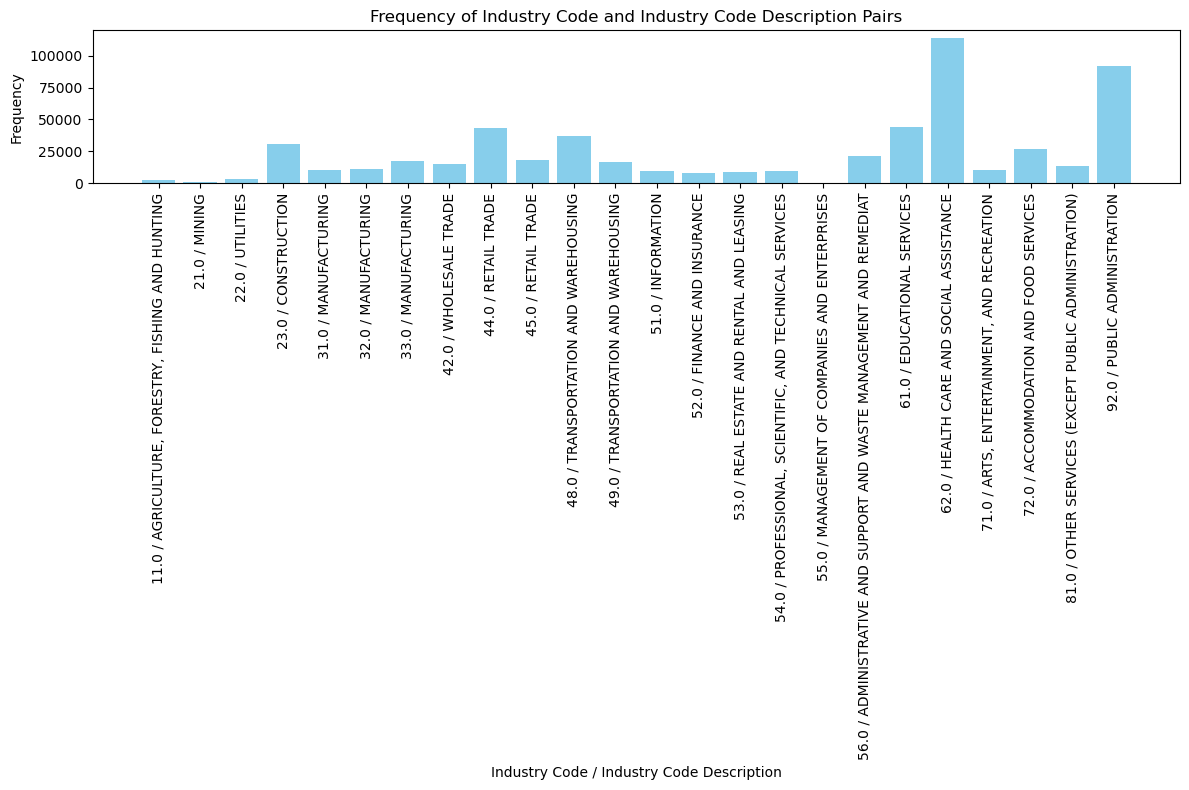

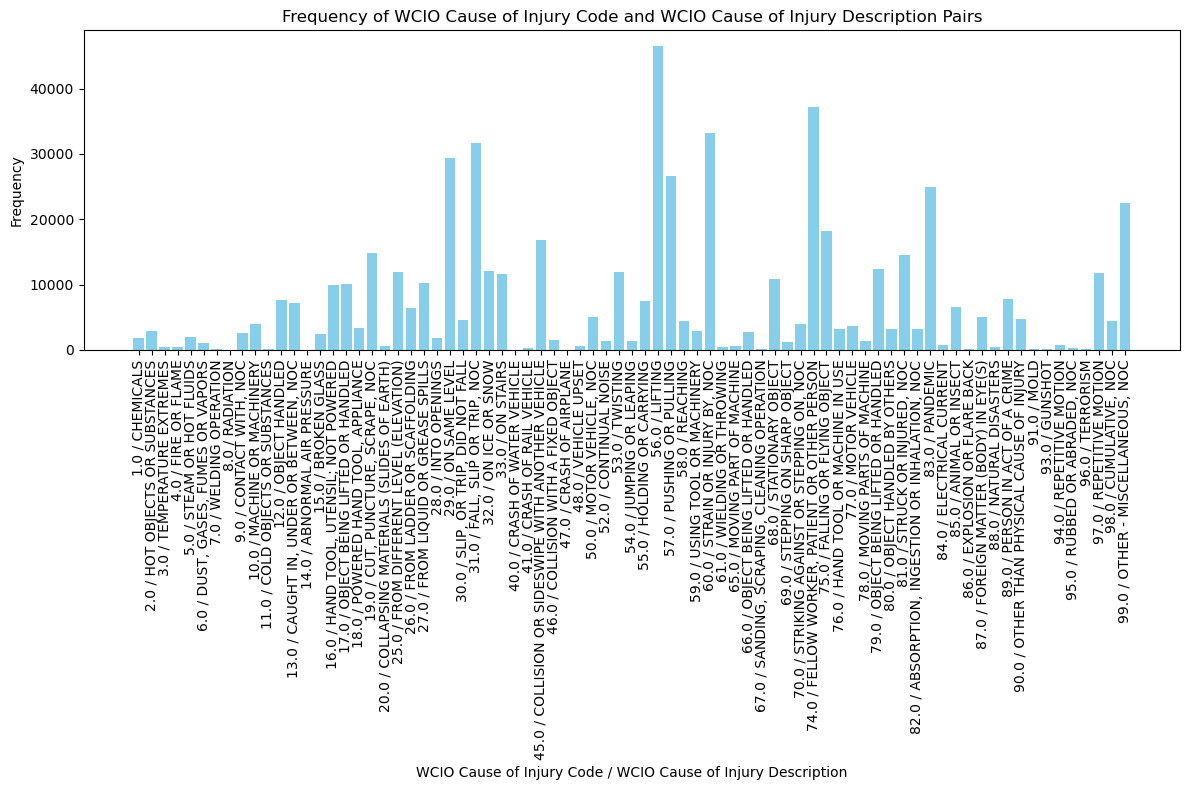

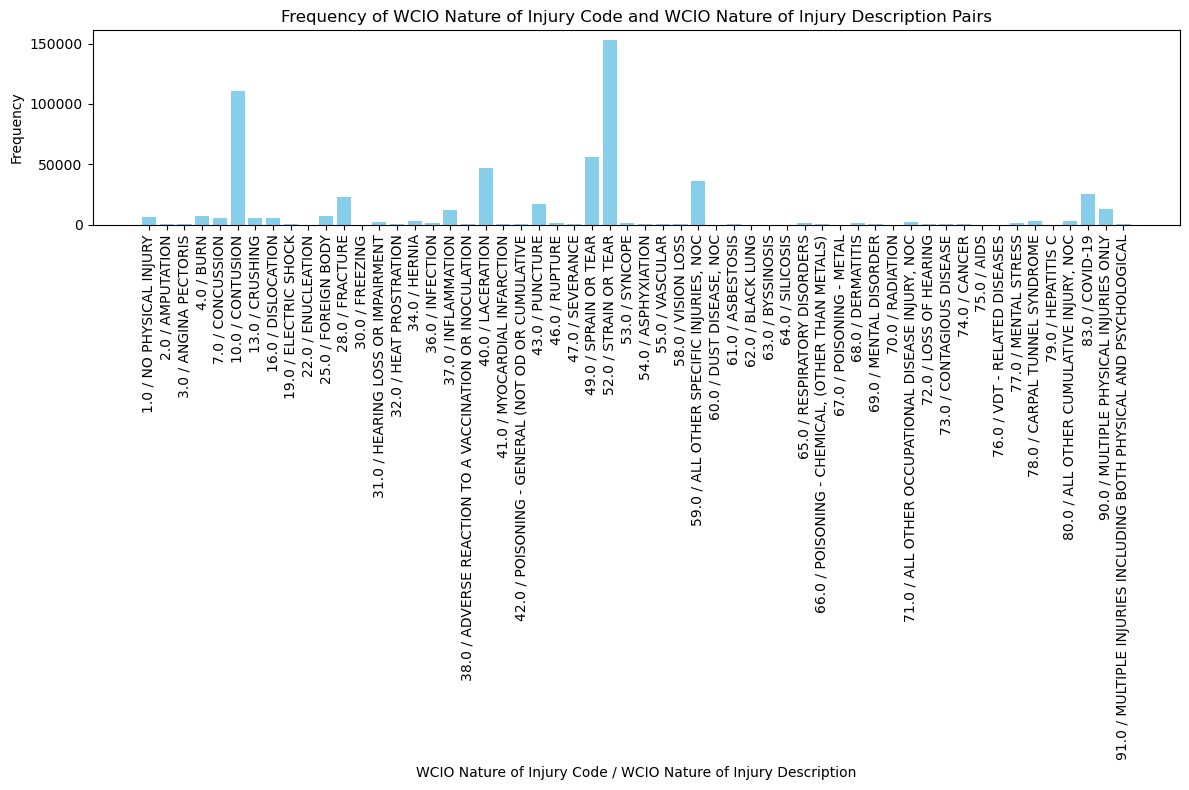

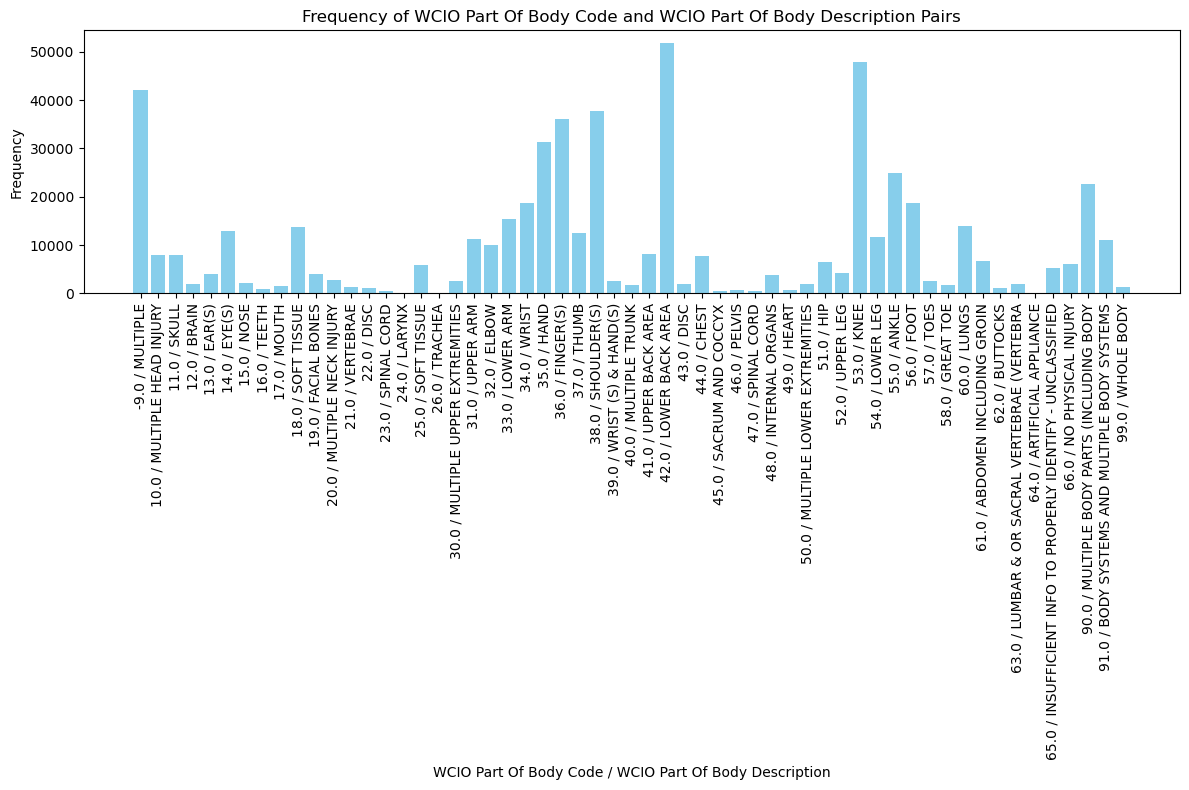

In [91]:
for code_col, desc_col in zip(df_codes.columns, df_description.columns):    
    code_column = code_col
    description_column = desc_col

    # Count occurrences of each code/description pair
    code_description_counts = X_train.groupby([code_column, description_column]).size().reset_index(name='Count').sort_index()

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(
        x=code_description_counts[code_column].astype(str) + ' / ' + code_description_counts[description_column],
        height=code_description_counts['Count'],
        color='skyblue'
    )

    # Formatting the plot
    plt.xlabel(f"{code_column} / {description_column}")
    plt.ylabel("Frequency")
    plt.title(f"Frequency of {code_column} and {description_column} Pairs")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

We can use the mode to fill the missing values

In [92]:
def fill_missing_with_mode(df, columns):
    """
    Fill missing values in a code column with the most frequent code.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - code (str): The name of the column representing codes.
    
    Returns:
    - pd.DataFrame: The DataFrame with missing values in the code column filled.
    """
    # Find the most frequent code
    for column in columns:
        most_frequent_code = df[column].mode().iloc[0]  # Get the mode (most frequent value)
        
        # Use .loc to avoid SettingWithCopyWarning and fill NaNs
        df.loc[:, column] = df[column].fillna(most_frequent_code)
    
    # Use .infer_objects to avoid FutureWarning if dtype downcasting is a concern
    df = df.infer_objects(copy=False)
    
    return df

In [93]:
codes_columns = df_codes.columns.tolist()
description_columns = df_description.columns.tolist()

# fill missing values in df_codes and df_description separately
X_train = fill_missing_with_mode(X_train, codes_columns)
X_train = fill_missing_with_mode(X_train, description_columns)

# fill missing values for test data
X_test = fill_missing_with_mode(X_test, codes_columns)
X_test = fill_missing_with_mode(X_test, description_columns)

In [94]:
target_features.remove('OIICS Nature of Injury Description')
X_train[target_features].isnull().sum()/X_train.shape[0]*100

Carrier Name                         0.0
Attorney/Representative              0.0
Industry Code                        0.0
Industry Code Description            0.0
Medical Fee Region                   0.0
C-2 Date                             0.0
First Hearing Date                   0.0
WCIO Cause of Injury Code            0.0
WCIO Cause of Injury Description     0.0
WCIO Part Of Body Code               0.0
WCIO Part Of Body Description        0.0
WCIO Cause of Injury Description     0.0
WCIO Cause of Injury Code            0.0
WCIO Nature of Injury Description    0.0
dtype: float64

### Data Scaling (Numerical)

In [99]:
#imported here for demonstrative purposes but it is a good practice to import everything at the start.
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.loc[:, ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']]
#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[0.26495726, 0.9851338 ,        nan, 0.16666667],
       [0.39316239, 0.97770069, 0.04166667, 0.66666667],
       [0.34188034, 0.98067393,        nan, 1.        ],
       ...,
       [0.52136752, 0.97175421, 0.        , 0.5       ],
       [0.20512821, 0.9900892 ,        nan, 0.83333333],
       [0.61538462, 0.96630327,        nan, 0.5       ]])

In [100]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

Age at Injury  Birth Year  IME-4 Count  Number of Dependents
Claim Identifier                                                              
5393875                0.264957    0.985134          NaN              0.166667
5393091                0.393162    0.977701     0.041667              0.666667
5393889                0.341880    0.980674          NaN              1.000000
5393887                0.521368    0.970268          NaN              0.166667
5393863                0.572650    0.967294          NaN              0.833333
...                         ...         ...          ...                   ...
6165265                0.299145    0.984638          NaN              0.666667
6165285                0.282051    0.985629          NaN              1.000000
6165506                0.521368    0.971754     0.000000              0.500000
6165339                0.205128    0.990089          NaN              0.833333
6165075                0.615385    0.966303          NaN              0.500000

[574026 rows x 4 columns]